**注意力机制**

灵长类动物的视觉系统接受了大量的感官输入，
这些感官输入远远超过了大脑能够完全处理的程度。
然而，并非所有刺激的影响都是相等的。
意识的聚集和专注使灵长类动物能够在复杂的视觉环境中将注意力引向感兴趣的物体，例如猎物和天敌。
只关注一小部分信息的能力对进化更加有意义，使人类得以生存和成功。

自19世纪以来，科学家们一直致力于研究认知神经科学领域的注意力。
本章的很多章节将涉及到一些研究。

首先回顾一个经典注意力框架，解释如何在视觉场景中展开注意力。
受此框架中的*注意力提示*（attention cues）的启发，
我们将设计能够利用这些注意力提示的模型。
<font color="red">**1964年的Nadaraya-Waston核回归**</font>（kernel regression）正是具有
<font color="red">**注意力机制**</font>（attention mechanism）的机器学习的简单演示。

然后继续介绍的是注意力函数，它们在深度学习的注意力模型设计中被广泛使用。
具体来说，我们将展示如何使用这些函数来设计*Bahdanau注意力*。
<font color="red">**Bahdanau注意力是深度学习中的具有突破性价值的注意力模型，它双向对齐并且可以微分**</font>。

最后将描述仅仅基于注意力机制的*Transformer*架构，
该架构中使用了*多头注意力*（multi-head attention）
和*自注意力*（self-attention）。
自2017年横空出世，Transformer一直都普遍存在于现代的深度学习应用中，
例如语言、视觉、语音和强化学习领域。

# 注意力提示

感谢读者对本书的关注，因为读者的注意力是一种稀缺的资源：
此刻读者正在阅读本书（而忽略了其他的书），
因此读者的注意力是用机会成本（与金钱类似）来支付的。
为了确保读者现在投入的注意力是值得的，
作者们尽全力（全部的注意力）创作一本好书。

自经济学研究稀缺资源分配以来，人们正处在“注意力经济”时代，
即人类的注意力被视为可以交换的、有限的、有价值的且稀缺的商品。
许多商业模式也被开发出来去利用这一点：
在音乐或视频流媒体服务上，人们要么消耗注意力在广告上，要么付钱来隐藏广告；
为了在网络游戏世界的成长，人们要么消耗注意力在游戏战斗中，
从而帮助吸引新的玩家，要么付钱立即变得强大。
总之，注意力不是免费的。

注意力是稀缺的，而环境中的干扰注意力的信息却并不少。
比如人类的视觉神经系统大约每秒收到$10^8$位的信息，
这远远超过了大脑能够完全处理的水平。
幸运的是，人类的祖先已经从经验（也称为数据）中认识到
“并非感官的所有输入都是一样的”。
在整个人类历史中，这种只将注意力引向感兴趣的一小部分信息的能力，
使人类的大脑能够更明智地分配资源来生存、成长和社交，
例如发现天敌、找寻食物和伴侣。

## 生物学中的注意力提示

注意力是如何应用于视觉世界中的呢？
这要从当今十分普及的 *双组件* （two-component）的框架开始讲起：
这个框架的出现可以追溯到19世纪90年代的威廉·詹姆斯，
他被认为是“美国心理学之父”(James, 2007)。
在这个框架中，受试者基于 *非自主性提示*和*自主性提示*
有选择地引导注意力的焦点。
>- James, W. (2007). **The principles of psychology**. Vol. 1. Cosimo, Inc.

非自主性提示是基于环境中物体的突出性和易见性。
想象一下，假如我们面前有五个物品：
一份报纸、一篇研究论文、一杯咖啡、一本笔记本和一本书，
就像[图10.1.1](#fig.10.1.1)。
所有纸制品都是黑白印刷的，但咖啡杯是红色的。
换句话说，这个咖啡杯在这种视觉环境中是突出和显眼的，
不由自主地引起人们的注意。
所以我们会把视力最敏锐的地方放到咖啡上，
如[图10.1.1](#fig.10.1.1)所示。

<span id='fig.10.1.1'></span>
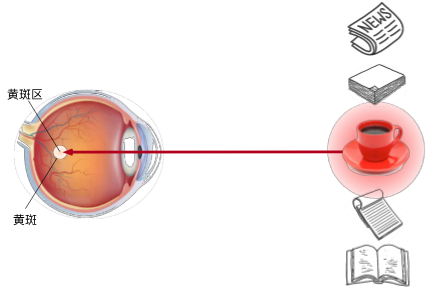
图10.1.1 由于突出性的非自主性提示（红杯子），注意力不自主地指向了咖啡杯

喝咖啡后，我们会变得兴奋并想读书，
所以转过头，重新聚焦眼睛，然后看看书，
就像[图10.1.2](#fig.10.1.2)中描述那样。
与[图10.1.1](#fig.10.1.1)中由于突出性导致的选择不同，
此时选择书是受到了认知和意识的控制，
因此注意力在基于自主性提示去辅助选择时将更为谨慎。
受试者的主观意愿推动，选择的力量也就更强大。

<span id='fig.10.1.2'></span>
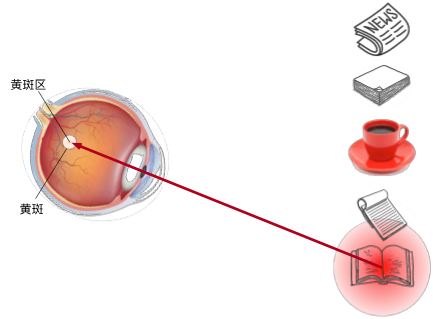
图10.1.2 依赖于任务的意志提示（想读一本书），注意力被自主引导到书上

## 查询、键和值

自主性的与非自主性的注意力提示解释了人类的注意力的方式，
下面来看看如何通过这两种注意力提示，
用神经网络来设计注意力机制的框架，

首先，考虑一个相对简单的状况，
即只使用非自主性提示。
要想将选择偏向于感官输入，
则可以简单地使用参数化的全连接层，
甚至是非参数化的最大汇聚层或平均汇聚层。

因此，“是否包含自主性提示”将注意力机制与全连接层或汇聚层区别开来。
在注意力机制的背景下，<font color="red">**自主性提示被称为<u>*查询*</u>（query）**</font>。
给定任何查询，注意力机制通过*注意力汇聚*（attention pooling）
将选择引导至*感官输入*（sensory inputs，例如中间特征表示）。
在注意力机制中，这些<font color="red">**感官输入被称为<u>*值*</u>（value）**</font>。
更通俗的解释，每个值都与一个*键*（key）配对，
这可以想象为感官输入的非自主提示。
如[图10.1.3](#fig.10.1.3)所示，可以通过<font color="red">**设计注意力汇聚的方式，
便于给定的查询（自主性提示）与键（非自主性提示）进行匹配，
这将引导得出最匹配的值（感官输入）**</font>。

<span id='fig.10.1.3'></span>
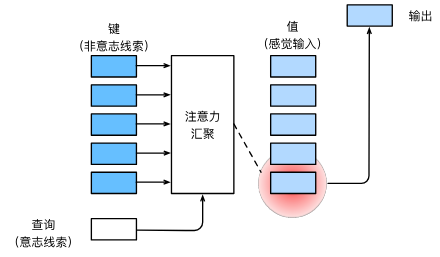
图10.1.3 注意力机制通过注意力汇聚将*查询*（自主性提示）和*键*（非自主性提示）结合在一起，实现对*值*（感官输入）的选择倾向

鉴于上面所提框架在[图10.1.3](#fig.10.1.3)中的主导地位，
因此这个框架下的模型将成为本章的中心。
然而，注意力机制的设计有许多替代方案。
例如可以设计一个不可微的注意力模型，
该模型可以使用强化学习方法 (Mnih et al., 2014) 进行训练。

>- Mnih, V., Heess, N., Graves, A., & others. (2014). **Recurrent models of visual attention**. Advances in neural information processing systems (pp. 2204–2212).

## 注意力的可视化

平均汇聚层可以被视为输入的加权平均值，
其中各输入的权重是一样的。
实际上，<font color="red">**注意力汇聚得到的是加权平均的总和值，
其中权重是在给定的查询和不同的键之间计算得出的**</font>。

In [ ]:
import torch, numpy
from matplotlib import pyplot as plt

为了可视化注意力权重，需要定义一个`show_heatmaps`函数。
其输入`matrices`的形状是
（要显示的行数，要显示的列数，查询的数目，键的数目）。

In [ ]:
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(4, 3), cmap='Reds'):
    """显示矩阵热图"""
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize, sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6);

下面使用一个简单的例子进行演示。
在本例子中，仅当查询和键相同时，注意力权重为1，否则为0。

In [ ]:
attention_weights = torch.reshape(torch.eye(10), (1, 1, 10, 10))
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries')

后面的章节内容将经常调用`show_heatmaps`函数来显示注意力权重。

## 小结

* 人类的注意力是有限的、有价值和稀缺的资源。
* 受试者使用非自主性和自主性提示有选择性地引导注意力。前者基于突出性，后者则依赖于意识。
* 注意力机制与全连接层或者汇聚层的区别源于增加的自主提示。
* 由于包含了自主性提示，注意力机制与全连接的层或汇聚层不同。
* 注意力机制通过注意力汇聚使选择偏向于值（感官输入），其中包含查询（自主性提示）和键（非自主性提示）。键和值是成对的。
* 可视化查询和键之间的注意力权重是可行的。

# 注意力汇聚：Nadaraya-Watson 核回归

上节介绍了框架下的注意力机制的主要成分[图10.1.3](#fig.10.1.3)：
查询（自主提示）和键（非自主提示）之间的交互形成了注意力汇聚；
注意力汇聚有选择地聚合了值（感官输入）以生成最终的输出。
本节将介绍注意力汇聚的更多细节，
以便从宏观上了解注意力机制在实践中的运作方式。
具体来说，1964年提出的Nadaraya-Watson核回归模型
是一个简单但完整的例子，可以用于演示具有注意力机制的机器学习。

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## 生成数据集

简单起见，考虑下面这个回归问题：
给定的成对的“输入－输出”数据集
$\{(x_1, y_1), \ldots, (x_n, y_n)\}$，
如何学习$f$来预测任意新输入$x$的输出$\hat{y} = f(x)$？

根据下面的非线性函数生成一个人工数据集，
其中加入的噪声项为$\epsilon$：

<span id='eq.10.2.1'></span>
$$\tag{10.2.1}
y_i = 2\sin(x_i) + x_i^{0.8} + \epsilon $$

其中$\epsilon$服从均值为$0$和标准差为$0.5$的正态分布。
在这里生成了$50$个训练样本和$50$个测试样本。
**为了更好地可视化之后的注意力模式，需要将训练样本进行排序**。

In [ ]:
n_train = 50  # 训练样本数
x_train, _ = torch.sort(torch.rand(n_train) * 5)   # 排序后的训练样本
def f(x):
    return 2 * torch.sin(x) + x**0.8
y_train = f(x_train) + torch.normal(0.0, 0.5, (n_train,))  # 训练样本的输出

print("x_train size =", x_train.size())
print(x_train, "\n")
print("y_train size =", y_train.size())
print(y_train, "\n")

x_test = torch.arange(0, 5, 0.1)  # 测试样本
y_truth = f(x_test)  # 测试样本的真实输出

print("x_test size =", x_test.size())
print(x_test, "\n")
print("y_train size =", y_train.size())
print(y_train)

下面的函数将绘制所有的训练样本（样本由圆圈表示），
不带噪声项的真实数据生成函数$f$（标记为“Truth”），
以及学习得到的预测函数（标记为“Pred”）。

In [ ]:
def plot_kernel_reg(y_hat):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x_test, y_truth, label='Truth')
    ax.plot(x_test, y_hat, label='Pred', linestyle='--')
    ax.plot(x_train, y_train, 'o', alpha=0.5);
    ax.legend(loc='upper right')
    ax.set_xlim([0, 5])
    ax.set_ylim([-1, 5])
    ax.grid(True)

## 平均汇聚

先使用最简单的估计器来解决回归问题。
基于平均汇聚来计算所有训练样本输出值的平均值：

<span id='eq.10.2.2'></span>
$$\tag{10.2.2}
f(x) = \frac{1}{n}\sum_{i=1}^n y_i$$

如下图所示，这个估计器确实不够聪明。
真实函数$f$（“Truth”）和预测函数（“Pred”）相差很大。

In [ ]:
y_hat = torch.repeat_interleave(y_train.mean(), len(x_test))
plot_kernel_reg(y_hat)

## 非参数注意力汇聚

显然，平均汇聚忽略了输入$x_i$。
于是 Nadaraya (Nadaraya, 1964) 和 Watson (Watson, 1964) 提出了一个更好的想法，
根据输入的位置对输出$y_i$进行加权：
>- Nadaraya, E. A. (1964). **On estimating regression**. Theory of Probability & Its Applications, 9(1), 141–142.
>- Watson, G. S. (1964). **Smooth regression analysis**. Sankhyā: The Indian Journal of Statistics, Series A, pp. 359–372.

<span id='eq.10.2.3'></span>
$$\tag{10.2.3}
f(x) = \sum_{i=1}^n \frac{K(x - x_i)}{\sum_{j=1}^n K(x - x_j)} y_i$$

其中$K$是*核*（kernel）。
公式 [(10.2.3)](#eq.10.2.3) 所描述的估计器被称为
*Nadaraya-Watson核回归*（Nadaraya-Watson kernel regression）。
这里不会深入讨论核函数的细节，
但受此启发，
我们可以从[图 10.1.3](#fig.10.1.3)中的注意力机制框架的角度
重写 [(10.2.3)](#eq.10.2.3)，
成为一个更加通用的<font color="red">**<u>*注意力汇聚*</u>（attention pooling）**</font>公式：

<span id='eq.10.2.4'></span>
$$\tag{10.2.4}
f(x) = \sum_{i=1}^n \alpha(x, x_i) y_i$$

其中$x$是查询，$(x_i, y_i)$是键值对。
比较 [(10.2.4)](#eq.10.2.4) 和 [(10.2.2)](#eq.10.2.2)，
注意力汇聚是$y_i$的加权平均。
<font color="red">**将查询$x$和键$x_i$之间的关系建模为
<u>*注意力权重*</u>（attention weight）**$\alpha(x, x_i)$</font>，
如[(10.2.4)](#eq.10.2.4)所示，
这个权重将<font color="red">**被分配给每一个对应值**$y_i$</font>。
对于任何查询，模型在所有键值对注意力权重都是一个有效的概率分布：
它们是非负的，并且总和为1。


为了更好地理解注意力汇聚，
下面考虑一个*高斯核*（Gaussian kernel），其定义为：

<span id='eq.10.2.5'></span>
$$\tag{10.2.5}
K(u) = \frac{1}{\sqrt{2\pi}} \exp(-\frac{u^2}{2})$$

将高斯核代入[(10.2.4)](#eq.10.2.4)和[(10.2.3)](#eq.10.2.3)可以得到：

<span id='eq.10.2.6'></span>
$$\tag{10.2.6}
\begin{aligned} f(x) &=\sum_{i=1}^n \alpha(x, x_i) y_i\\ &= \sum_{i=1}^n \frac{\exp\left(-\frac{1}{2}(x - x_i)^2\right)}{\sum_{j=1}^n \exp\left(-\frac{1}{2}(x - x_j)^2\right)} y_i \\&= \sum_{i=1}^n \mathrm{softmax}\left(-\frac{1}{2}(x - x_i)^2\right) y_i. \end{aligned}$$

在[(10.2.6)](#eq.10.2.6)中，
<font color="red">**如果一个键$x_i$越是接近给定的查询$x$，
那么分配给这个键对应值$y_i$的注意力权重就会越大，
也就“获得了更多的注意力”**</font>。

值得注意的是，Nadaraya-Watson核回归是一个非参数模型。
因此，[(10.2.6)](#eq.10.2.6)是
*非参数的注意力汇聚*（nonparametric attention pooling）模型。
接下来，我们将基于这个非参数的注意力汇聚模型来绘制预测结果。
从绘制的结果会发现新的模型预测线是平滑的，并且比平均汇聚的预测更接近真实。

### 例2.3.1

In [ ]:
# X_repeat的形状:(n_test,n_train),
X_repeat = torch.reshape(x_test.repeat_interleave(n_train), (-1, n_train))

print("x_test size =", x_test.size())
print(x_test, "\n")
print("X_repeat (query) size = ", X_repeat.size())
print(X_repeat, "\n")
print("x_train (key) size = ", x_train.size())
print(x_train, "\n")
print("X_repeat - x_train size = ", (X_repeat - x_train).size())
print(X_repeat - x_train, "\n")
print("X_repeat - x_train == X_repeat - x_train.repeat(n_train, 1) ?",
      (X_repeat - x_train == X_repeat - x_train.repeat(n_train, 1)).all())

In [ ]:
# x_train包含着键。attention_weights的形状：(n_test,n_train),
# 每一行都包含着要在给定的每个查询的值（y_train）之间分配的注意力权重
attention_weights = nn.functional.softmax(-(X_repeat - x_train)**2 / 2, dim=1)

# y_hat的每个元素都是值的加权平均值，其中的权重是注意力权重
y_hat = torch.matmul(attention_weights, y_train)

print("attention_weights size = ", attention_weights.size(), "\n")
print("y_train size = ", y_train.size())
for ii in range(len(attention_weights)):
    print(attention_weights[ii] @ y_train, " = ", y_hat[ii], "?", attention_weights[ii] @ y_train - y_hat[ii] < torch.tensor(1e-6))

In [ ]:
plot_kernel_reg(y_hat)

refer to: [torch.repeat_interleave](Torch_part1_basic.ipynb/#torch.repeat_interleave)

现在来观察注意力的权重。
这里测试数据的输入相当于查询，而训练数据的输入相当于键。
因为两个输入都是经过排序的，因此由观察可知**“查询-键”对越接近，
注意力汇聚的注意力权重就越高**。

In [ ]:
show_heatmaps(attention_weights.unsqueeze(0).unsqueeze(0),
              xlabel='Sorted training inputs',
              ylabel='Sorted testing inputs')

### 例2.3.2

In [ ]:
x_train_2 = torch.as_tensor([1.3261, 1.7632, 2.2849, 3.7667, 4.0057])
y_train_2 = torch.as_tensor([3.3744, 3.9904, 3.9660, 1.5305, 1.4809])

# X_tile的形状:(n_train，n_train)，每一行都包含着相同的训练输入
keys_2 = x_train_2.repeat((len(x_train_2), 1))
# Y_tile的形状:(n_train，n_train)，每一行都包含着相同的训练输出
values_2 = y_train_2.repeat((len(y_train_2), 1))

print("x_train size =", x_train_2.shape)
print(x_train_2, "\n")
print("y_train size =", y_train_2.shape)
print(y_train_2, "\n")

print("keys size =", keys_2.shape)
print(keys_2, "\n")
print("values size =", values_2.shape)
print(values_2)

In [ ]:
queries_2 = torch.reshape(x_train_2.repeat_interleave(keys_2.shape[1]), (-1, keys_2.shape[1]))
attention_weights_2 = nn.functional.softmax(-((queries_2 - keys_2) * 1)**2 / 2, dim=1)

print("queries size =", queries_2.shape)
print(queries_2, "\n")
print("keys size =", keys_2.shape)
print(keys_2, "\n")
print("attention_weights size =", attention_weights_2.shape)
print(attention_weights_2)

In [ ]:
output = torch.bmm(attention_weights_2.unsqueeze(1), values_2.unsqueeze(-1)).reshape(-1)
print(output)

#### Note

$queries \triangleq \left[ \begin{matrix}
x & \cdots & \cdots & \cdots & \cdots \\
x\_train[1] & \cdots & \cdots & \cdots & \cdots \\
x\_train[2] & \cdots & \cdots & \cdots & \cdots \\
x\_train[3] & \cdots & \cdots & \cdots & \cdots \\
x\_train[4] & \cdots & \cdots & \cdots & \cdots \\
\end{matrix} \right]$

$keys \triangleq \left[ \begin{matrix}
x_1 & x_2 & x_3 & x_4 & x_5 \\
\cdots & \cdots & \cdots & \cdots & \cdots \\
\cdots & \cdots & \cdots & \cdots & \cdots \\
\cdots & \cdots & \cdots & \cdots & \cdots \\
\cdots & \cdots & \cdots & \cdots & \cdots \\
\end{matrix} \right]$

$attention\_weights \triangleq \left[ \begin{matrix}
\alpha(x, x_1) & \alpha(x, x_2) & \alpha(x, x_3) & \alpha(x, x_4) & \alpha(x, x_5) \\
\cdots & \cdots & \cdots & \cdots & \cdots \\
\cdots & \cdots & \cdots & \cdots & \cdots \\
\cdots & \cdots & \cdots & \cdots & \cdots \\
\cdots & \cdots & \cdots & \cdots & \cdots \\
\end{matrix}\right]$

$values \triangleq \left[ \begin{matrix}
y_1 & y_2 & y_3 & y_4 & y_5 \\
\cdots & \cdots & \cdots & \cdots & \cdots \\
\cdots & \cdots & \cdots & \cdots & \cdots \\
\cdots & \cdots & \cdots & \cdots & \cdots \\
\cdots & \cdots & \cdots & \cdots & \cdots \\
\end{matrix}\right]$

$f(queries) \triangleq \left[ \begin{matrix}
y \\
\cdots \\
\cdots \\
\cdots \\
\cdots \\
\end{matrix}\right] $

1. `queries`中的第一列是所有输入样本, 即一组查询; 其他列仅方便计算, 并无实际意义; 样本集由成对的“输入－输出”数据组成, 例如$\{(x_1, y_1), \ldots, (x_n, y_n)\}$.
2. 以`queries`第一列的第一个元素$x$(查询)为例, 已知查询$x$与一组键$x_1, x_2, x_3, x_4, x_5$, 根据[(10.2.6)](#eq.10.2.6)可得到一组注意力权重(attention weight)$\alpha(x, x_1)$, $\alpha(x, x_2)$, $\alpha(x, x_3)$, $\alpha(x, x_4)$, $\alpha(x, x_5)$, 它们是一组和为1的概率. 
3. 然后attention weight ($\alpha(x, x_1)$, $\alpha(x, x_2)$, $\alpha(x, x_3)$, $\alpha(x, x_4)$, $\alpha(x, x_5)$) 与 values ($y_1, y_2, y_3, y_4, y_5$) 内积/点乘得到($x$对应的)输出$y$, 即$y = \sum_{i=1}^5 \alpha(x, x_i) y_i$.
4. 数学意义: 根据$x$分别到$x_1, x_2, x_3, x_4, x_5$的距离, 为$y_1, y_2, y_3, y_4, y_5$分配概率权重, 从而得到一个加权输出$y$. 本质上是一个拟合问题.

#### 验证

In [ ]:
for idx_row in range(len(queries_2)):
    for idx_col in range(len(queries_2[0])):
        x = queries_2[idx_row][0]
        x_i = keys_2[idx_row][idx_col]
        w_i = torch.exp(-0.5 * torch.square(x - x_i)) / torch.exp(-0.5 * torch.square(x - keys_2[idx_row])).sum()
        print("index = (", idx_row, ",", idx_col, "), x = ", x, ", x_i = ", x_i)
        print("a(x, x_i) = ", w_i, " vs  attention_weight = ", attention_weights_2[idx_row][idx_col],
              "?", w_i - attention_weights_2[idx_row][idx_col] < torch.tensor(1e-7), "\n")

In [ ]:
for idx_row in range(len(attention_weights_2)):
    print("index of row = ", idx_row,
          ", sum = ", attention_weights_2[idx_row].sum(),
          "?", attention_weights_2[idx_row].sum() - torch.tensor(1) < torch.tensor(1e-8))

In [ ]:
for ii in range(len(output)):
    print(attention_weights_2[ii] @ values_2[ii], "vs",  output[ii],
          "?", attention_weights_2[ii] @ values_2[ii] - output[ii] < torch.tensor(1e-8))

## 带参数注意力汇聚

<font color="red">**非参数的Nadaraya-Watson核回归具有<u>*一致性*</u>（consistency）的优点：
如果有足够的数据，此模型会收敛到最优结果**</font>。
尽管如此，我们还是可以轻松地将可学习的参数集成到注意力汇聚中。

例如，与 [(10.2.6)](#eq.10.2.6) 略有不同，
在下面的查询$x$和键$x_i$之间的距离乘以可学习参数$w$：

<span id='eq.10.2.7'></span>
$$\tag{10.2.7}
\begin{aligned}f(x) &= \sum_{i=1}^n \alpha(x, x_i) y_i \\&= \sum_{i=1}^n \frac{\exp\left(-\frac{1}{2}((x - x_i)w)^2\right)}{\sum_{j=1}^n \exp\left(-\frac{1}{2}((x - x_j)w)^2\right)} y_i \\&= \sum_{i=1}^n \mathrm{softmax}\left(-\frac{1}{2}((x - x_i)w)^2\right) y_i.\end{aligned}$$

本节的余下部分将通过训练这个模型 [(10.2.7)](#eq.10.2.7) 来学习注意力汇聚的参数。

### 批量矩阵乘法


为了更有效地计算小批量数据的注意力，
我们可以利用深度学习开发框架中提供的批量矩阵乘法。

假设第一个小批量数据包含$n$个矩阵$\mathbf{X}_1,\ldots, \mathbf{X}_n$，
形状为$a\times b$，
第二个小批量包含$n$个矩阵$\mathbf{Y}_1, \ldots, \mathbf{Y}_n$，
形状为$b\times c$。
它们的批量矩阵乘法得到$n$个矩阵
$\mathbf{X}_1\mathbf{Y}_1, \ldots, \mathbf{X}_n\mathbf{Y}_n$，
形状为$a\times c$。
因此，假定两个张量的形状分别是$(n,a,b)$和$(n,b,c)$，
它们的批量矩阵乘法输出的形状为$(n,a,c)$。

In [ ]:
X = torch.ones((2, 1, 4))
Y = torch.ones((2, 4, 6))
torch.bmm(X, Y).shape

在注意力机制的背景中，我们可以使用小批量矩阵乘法来计算小批量数据中的加权平均值。

In [ ]:
weights = torch.ones((2, 10)) * 0.1
values = torch.reshape(torch.arange(20.0), (2, 10))

print("weights size =", weights.size())
print(weights)
print("weights.unsqueeze(1) size =", weights.unsqueeze(1).size(), "\n")

print("values size =", values.size())
print(values)
print("values.unsqueeze(-1) size =", values.unsqueeze(-1).size())

torch.bmm(weights.unsqueeze(1), values.unsqueeze(-1))

refer to: [torch.unsqueeze](Torch_part1_basic.ipynb/#torch.unsqueeze)

### 定义模型

基于 [(10.2.7)](#eq.10.2.7) 中的
带参数的注意力汇聚，使用小批量矩阵乘法，
定义Nadaraya-Watson核回归的带参数版本为：

In [ ]:
class NWKernelRegression(nn.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = nn.Parameter(torch.rand((1,), requires_grad=True))

    def forward(self, queries, keys, values):
        # queries和attention_weights的形状为(查询个数，“键－值”对个数)
        queries = torch.reshape(queries.repeat_interleave(keys.shape[1]), (-1, keys.shape[1]))
        self.attention_weights = nn.functional.softmax(-((queries - keys) * self.w)**2 / 2, dim=1)
        # values的形状为(查询个数，“键－值”对个数)
        return torch.bmm(self.attention_weights.unsqueeze(1), values.unsqueeze(-1)).reshape(-1)

### 训练

接下来，将训练数据集变换为键和值用于训练注意力模型。
在带参数的注意力汇聚模型中，
任何一个训练样本的输入都会和除自己以外的所有训练样本的“键－值”对进行计算，
从而得到其对应的预测输出。

In [ ]:
# X_tile的形状:(n_train，n_train)，每一行都包含着相同的训练输入
X_tile = x_train.repeat((n_train, 1))

# Y_tile的形状:(n_train，n_train)，每一行都包含着相同的训练输出
Y_tile = y_train.repeat((n_train, 1))

# keys的形状:('n_train'，'n_train'-1)
keys = X_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))

# values的形状:('n_train'，'n_train'-1)
values = Y_tile[(1 - torch.eye(n_train)).type(torch.bool)].reshape((n_train, -1))

> Note:
- `keys`是将`X_tile`主对角线元素去掉之后, 将左推移得到的新矩阵.
- 与 [例2.3.2](#例2.3.2) 的区别: 用其他所有的点拟合当前点. 例如, 用$(x_1, y_1)$, $(x_2, y_2)$, $(x_4, y_4)$, $(x_5, y_5)$拟合$(x_3, y_3)$, 在拟合时不考虑$(x_3, y_3)$对拟合结果的影响.

训练带参数的注意力汇聚模型时，使用平方损失函数和随机梯度下降。

In [ ]:
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline
from IPython import display
class Animator:
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        backend_inline.set_matplotlib_formats('svg')
        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: self.set_axes(self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts
    
    def set_axes(self, axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
        """Set the axes for matplotlib"""
        axes.set_xlabel(xlabel)
        axes.set_ylabel(ylabel)
        axes.set_xscale(xscale)
        axes.set_yscale(yscale)
        axes.set_xlim(xlim)
        axes.set_ylim(ylim)
        if legend:
            axes.legend(legend)
        axes.grid()
    
    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [ ]:
net = NWKernelRegression()
loss = nn.MSELoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=0.5)
animator = Animator(xlabel='epoch', ylabel='loss', xlim=[1, 5])

for epoch in range(5):
    trainer.zero_grad()
    l = loss(net(x_train, keys, values), y_train)
    l.sum().backward()
    trainer.step()
    print(f'epoch {epoch + 1}, loss {float(l.sum()):.6f}')
    animator.add(epoch + 1, float(l.sum()))

如下所示，训练完带参数的注意力汇聚模型后可以发现：
在尝试拟合带噪声的训练数据时，
预测结果绘制的线不如之前非参数模型的平滑。

In [ ]:
n_test = len(x_test)  # 测试样本数

# keys的形状:(n_test，n_train)，每一行包含着相同的训练输入（例如，相同的键）
keys = x_train.repeat((n_test, 1))
# value的形状:(n_test，n_train)
values = y_train.repeat((n_test, 1))
y_hat = net(x_test, keys, values).unsqueeze(1).detach()
plot_kernel_reg(y_hat)

为什么新的模型更不平滑了呢？
下面看一下输出结果的绘制图：
与非参数的注意力汇聚模型相比，
带参数的模型加入可学习的参数后，
曲线在注意力权重较大的区域变得更不平滑。

In [ ]:
show_heatmaps(net.attention_weights.unsqueeze(0).unsqueeze(0),
              xlabel='Sorted training inputs',
              ylabel='Sorted testing inputs')

## 小结

* Nadaraya-Watson核回归是具有注意力机制的机器学习范例。
* Nadaraya-Watson核回归的注意力汇聚是对训练数据中输出的加权平均。从注意力的角度来看，分配给每个值的注意力权重取决于将值所对应的键和查询作为输入的函数。
* 注意力汇聚可以分为非参数型和带参数型。

# 注意力评分函数
refer to: https://zh.d2l.ai/chapter_attention-mechanisms/attention-scoring-functions.html  

[10.2节](#注意力汇聚：Nadaraya-Watson-核回归)使用了高斯核来对查询和键之间的关系建模。
[(10.2.6)](#eq.10.2.6)中的
<font color="red">高斯核指数部分可以视为<u>*注意力评分函数*</u>（attention scoring function），
简称<u>*评分函数*</u>（scoring function），
然后把这个函数的输出结果输入到softmax函数中进行运算。
通过上述步骤，将得到与键对应的值的概率分布（即注意力权重）。
最后，注意力汇聚的输出就是基于这些注意力权重的值的加权和</font>。

从宏观来看，上述算法可以用来实现
[图10.1.3](#fig.10.1.3) 中的注意力机制框架。
[图10.3.1](#fig.10.3.1)说明了
如何将注意力汇聚的输出计算成为值的加权和，
其中<font color="red">$a$表示注意力评分函数</font>。
由于注意力权重是概率分布，
因此加权和其本质上是加权平均值。

<span id='fig.10.3.1'></span>
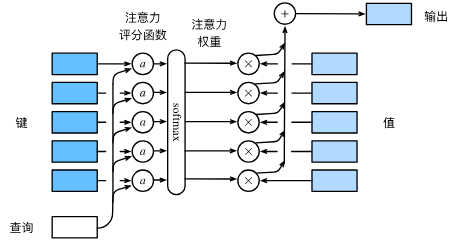
图10.3.1 计算注意力汇聚的输出为值的加权和

用数学语言描述，假设有一个查询
$\mathbf{q} \in \mathbb{R}^q$和
$m$个“键－值”对
$(\mathbf{k}_1, \mathbf{v}_1), \ldots, (\mathbf{k}_m, \mathbf{v}_m)$，
其中$\mathbf{k}_i \in \mathbb{R}^k$，$\mathbf{v}_i \in \mathbb{R}^v$。
注意力汇聚函数$f$就被表示成值的加权和：

<span id='eq.10.3.1'></span>
$$\tag{10.3.1}
f(\mathbf{q}, (\mathbf{k}_1, \mathbf{v}_1), \ldots, (\mathbf{k}_m, \mathbf{v}_m)) = \sum_{i=1}^m \alpha(\mathbf{q}, \mathbf{k}_i) \mathbf{v}_i \in \mathbb{R}^v$$

其中查询$\mathbf{q}$和键$\mathbf{k}_i$的注意力权重（标量）
是通过注意力评分函数$a$将两个向量映射成标量，
再经过softmax运算得到的：

<span id='eq.10.3.2'></span>
$$\tag{10.3.2}
\alpha(\mathbf{q}, \mathbf{k}_i) = \mathrm{softmax}(a(\mathbf{q}, \mathbf{k}_i)) = \frac{\exp(a(\mathbf{q}, \mathbf{k}_i))}{\sum_{j=1}^m \exp(a(\mathbf{q}, \mathbf{k}_j))} \in \mathbb{R}.$$

正如上图所示，选择不同的注意力评分函数$a$会导致不同的注意力汇聚操作。
本节将介绍两个流行的评分函数，稍后将用他们来实现更复杂的注意力机制。

## 掩蔽softmax操作

正如上面提到的，softmax操作用于输出一个概率分布作为注意力权重。
在某些情况下，并非所有的值都应该被纳入到注意力汇聚中。
例如，为了在[9.5节]()中高效处理小批量数据集，
某些文本序列被填充了没有意义的特殊词元。
为了仅将有意义的词元作为值来获取注意力汇聚，
可以指定一个有效序列长度（即词元的个数），
以便在计算softmax时过滤掉超出指定范围的位置。
下面的`masked_softmax`函数
实现了这样的*掩蔽softmax操作*（masked softmax operation），
其中任何超出有效长度的位置都被掩蔽并置为0。

In [ ]:
import math, torch
from torch import nn

In [ ]:
def sequence_mask(X, valid_len, value=0):
    """Mask irrelevant entries in sequences.

    Defined in :numref:`sec_seq2seq_decoder`"""
    maxlen = X.size(1)
    mask = torch.arange((maxlen), dtype=torch.float32, device=X.device)[None, :] < valid_len[:, None]
    X[~mask] = value
    return X
def masked_softmax(X, valid_lens):
    """通过在最后一个轴上掩蔽元素来执行softmax操作"""
    # X:3D张量，valid_lens:1D或2D张量
    if valid_lens is None:
        return nn.functional.softmax(X, dim=-1)
    else:
        shape = X.shape
        if valid_lens.dim() == 1:
            valid_lens = torch.repeat_interleave(valid_lens, shape[1])
        else:
            valid_lens = valid_lens.reshape(-1)
        # 最后一轴上被掩蔽的元素使用一个非常大的负值替换，从而其softmax输出为0
        X = sequence_mask(X.reshape(-1, shape[-1]), valid_lens, value=0)
        return nn.functional.softmax(X.reshape(shape), dim=-1)

为了演示此函数是如何工作的，
考虑由两个$2 \times 4$矩阵表示的样本，
这两个样本的有效长度分别为$2$和$3$。
经过掩蔽softmax操作，超出有效长度的值都被掩蔽为0。

In [ ]:
X = torch.tensor([[[0.0343, 0.0830, 0.2883, 0.7795],
                   [0.6423, 0.1566, 0.5636, 0.0877]],
                  [[0.2908, 0.3970, 0.9207, 0.7803],
                   [0.4699, 0.2348, 0.0882, 0.1583]]])

In [ ]:
masked_softmax(X, torch.tensor([2, 3]))

> `masked_softmax(X, torch.tensor([2, 3]))` 计算流:

In [ ]:
shape = X.shape
print("X size = ", shape, "\n")

valid_lens = torch.tensor([2, 3])
print("valid_lens = ", valid_lens, "\n")

valid_lens = torch.repeat_interleave(valid_lens, shape[1])
print("valid_lens = ", valid_lens, "\n")

print("--------- sequence_mask ---------")
X, valid_len = X.reshape(-1, shape[-1]), valid_lens
print("X = ", X, "\n")
print("valid_len = ", valid_len, "\n")

maxlen = X.size(1)
mask = torch.arange((maxlen), dtype=torch.float32, device=X.device)[None, :] < valid_len[:, None]
print("mask = ", mask, "\n")

value = 0
X[~mask] = value
print("X = ", X, "\n")
print("--------- ---------")

output = nn.functional.softmax(X.reshape(shape), dim=-1)
print("output = ", output, "\n")

同样，也可以使用二维张量，为矩阵样本中的每一行指定有效长度。

In [ ]:
X = torch.tensor([[[0.0343, 0.0830, 0.2883, 0.7795],
                   [0.6423, 0.1566, 0.5636, 0.0877]],
                  [[0.2908, 0.3970, 0.9207, 0.7803],
                   [0.4699, 0.2348, 0.0882, 0.1583]]])

In [ ]:
masked_softmax(X, torch.tensor([[1, 3], [2, 4]]))

> `masked_softmax(X, torch.tensor([[1, 3], [2, 4]]))` 计算流:

In [ ]:
shape = X.shape
print("X size = ", shape, "\n")

valid_lens = torch.tensor([[1, 3], [2, 4]])
print("valid_lens = ", valid_lens, "\n")

valid_lens = valid_lens = valid_lens.reshape(-1)
print("valid_lens = ", valid_lens, "\n")

print("--------- sequence_mask ---------")
X, valid_len = X.reshape(-1, shape[-1]), valid_lens
print("X = ", X, "\n")
print("valid_len = ", valid_len, "\n")

maxlen = X.size(1)
mask = torch.arange((maxlen), dtype=torch.float32, device=X.device)[None, :] < valid_len[:, None]
print("mask = ", mask, "\n")

value = 0
X[~mask] = value
print("X = ", X, "\n")
print("--------- ---------")

output = nn.functional.softmax(X.reshape(shape), dim=-1)
print("output = ", output, "\n")

## 加性注意力

一般来说，当查询和键是不同长度的矢量时，可以使用加性注意力作为评分函数。
给定查询$\mathbf{q} \in \mathbb{R}^q$和
键$\mathbf{k} \in \mathbb{R}^k$，
*加性注意力*（additive attention）的评分函数为

<span id='eq.10.3.3'></span>
$$\tag{10.3.3}
a(\mathbf q, \mathbf k) = \mathbf w_v^\top \text{tanh}(\mathbf W_q\mathbf q + \mathbf W_k \mathbf k) \in \mathbb{R}$$

其中可学习的参数是$\mathbf W_q\in\mathbb R^{h\times q}$、
$\mathbf W_k\in\mathbb R^{h\times k}$和
$\mathbf w_v\in\mathbb R^{h}$。
如[(10.3.3)](#eq.10.3.3)所示，
将查询和键连结起来后输入到一个多层感知机（MLP）中，
感知机包含一个隐藏层，其隐藏单元数是一个超参数$h$。
通过使用$\tanh$作为激活函数，并且禁用偏置项。

下面来实现加性注意力。

In [ ]:
def sequence_mask(X, valid_len, value=0):
    """Mask irrelevant entries in sequences.

    Defined in :numref:`sec_seq2seq_decoder`"""
    maxlen = X.size(1)
    mask = torch.arange((maxlen), dtype=torch.float32, device=X.device)[None, :] < valid_len[:, None]
    X[~mask] = value
    return X

def masked_softmax(X, valid_lens):
    """通过在最后一个轴上掩蔽元素来执行softmax操作"""
    # X:3D张量，valid_lens:1D或2D张量
    if valid_lens is None:
        return nn.functional.softmax(X, dim=-1)
    else:
        shape = X.shape
        if valid_lens.dim() == 1:
            valid_lens = torch.repeat_interleave(valid_lens, shape[1])
        else:
            valid_lens = valid_lens.reshape(-1)
        # 最后一轴上被掩蔽的元素使用一个非常大的负值替换，从而其softmax输出为0
        X = sequence_mask(X.reshape(-1, shape[-1]), valid_lens, value=0)
        return nn.functional.softmax(X.reshape(shape), dim=-1)

In [ ]:
class AdditiveAttention(nn.Module):
    """加性注意力"""
    def __init__(self, key_size, query_size, num_hiddens, dropout, **kwargs):
        super(AdditiveAttention, self).__init__(**kwargs)
        self.W_k = nn.Linear(key_size, num_hiddens, bias=False)
        self.W_q = nn.Linear(query_size, num_hiddens, bias=False)
        self.w_v = nn.Linear(num_hiddens, 1, bias=False)
        self.dropout = nn.Dropout(dropout)

    def forward(self, queries, keys, values, valid_lens):
        queries, keys = self.W_q(queries), self.W_k(keys)
        # 在维度扩展后，
        # queries的形状：(batch_size，查询的个数，1，num_hidden)
        # key的形状：(batch_size，1，“键－值”对的个数，num_hiddens)
        # 使用广播方式进行求和
        features = queries.unsqueeze(2) + keys.unsqueeze(1)
        features = torch.tanh(features)
        # self.w_v仅有一个输出，因此从形状中移除最后那个维度。
        # scores的形状：(batch_size，查询的个数，“键-值”对的个数)
        scores = self.w_v(features).squeeze(-1)
        self.attention_weights = masked_softmax(scores, valid_lens)
        # values的形状：(batch_size，“键－值”对的个数，值的维度)
        return torch.bmm(self.dropout(self.attention_weights), values)

用一个小例子来演示上面的`AdditiveAttention`类，
其中查询、键和值的形状为（批量大小，步数或词元序列长度，特征大小），
实际输出为$(2,1,20)$、$(2,10,2)$和$(2,10,4)$。
注意力汇聚输出的形状为（批量大小，查询的步数，值的维度）。

In [ ]:
queries, keys = torch.normal(0, 1, (2, 1, 20)), torch.ones((2, 10, 2))
# values的小批量，两个值矩阵是相同的
values = torch.arange(40, dtype=torch.float32).reshape(1, 10, 4).repeat(2, 1, 1)
valid_lens = torch.tensor([2, 6])

attention = AdditiveAttention(key_size=2, query_size=20, num_hiddens=8, dropout=0.1)
attention.eval()
attention(queries, keys, values, valid_lens)

尽管加性注意力包含了可学习的参数，但由于本例子中每个键都是相同的，
所以注意力权重是均匀的，由指定的有效长度决定。

In [ ]:
from matplotlib import pyplot as plt
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(4, 3), cmap='Reds'):
    """显示矩阵热图"""
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize, sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6)

show_heatmaps(torch.reshape(attention.attention_weights, (1, 1, 2, 10)), xlabel='Keys', ylabel='Queries')

> AdditiveAttention 计算流:
> 1. queries, keys, values 初始化

In [ ]:
batch_size = 2
num_queries = 1
query_size = 6
num_kvpairs = 5
key_size = 2
value_size = 4
num_hiddens = 3

queries = torch.normal(0, 1, (batch_size, num_queries, query_size))
keys = torch.ones((batch_size, num_kvpairs, key_size))
values = torch.arange(num_kvpairs * value_size, dtype=torch.float32).reshape(
            1, num_kvpairs, value_size).repeat(batch_size, 1, 1)
print("queries size = ", queries.shape)
print("num of batches = ", batch_size, ", number of queries = ", num_queries, ", each query length = ", query_size)
print(queries, "\n")

print("keys size = ", keys.shape)
print("num of batches = ", batch_size, ", number of key-value pairs = ", num_kvpairs, ", each key length = ", key_size)
print(keys, "\n")

print("values size = ", values.shape)
print("num of batches = ", batch_size, ", number of key-value pairs = ", num_kvpairs, ", each value length = ", value_size)
print(values)

valid_lens = torch.tensor([2, 6])

> 2. Linear layer
$$\mathbf W_q\mathbf q \quad\&\quad \mathbf W_k \mathbf k$$

In [ ]:
W_q = nn.Linear(query_size, num_hiddens, bias=False)
W_k = nn.Linear(key_size, num_hiddens, bias=False)
print("queries size = ", queries.shape)
print("keys size = ", keys.shape, "\n")

print("Linear layer W_q = ", W_q)
print("Linear layer W_k = ", W_k, "\n")

print("W_q(queries) size = ", W_q(queries).shape)
print("W_k(keys) size = ", W_k(keys).shape)
queries = W_q(queries)
keys = W_k(keys)

> 3. features
$$ \text{features} = \text{tanh}(\mathbf W_q\mathbf q + \mathbf W_k \mathbf k) $$

In [ ]:
print("queries.unsqueeze(2) size = ", queries.unsqueeze(2).shape)
print("num of batches = ", batch_size, ", number of queries = ", num_queries,
      ", position of unsqueeze", ", num of hiddens = ", num_hiddens, "\n")

print("keys.unsqueeze(1) size = ", keys.unsqueeze(1).shape)
print("num of batches = ", batch_size, ", position of unsqueeze",
      ", number of key-value pairs = ", num_kvpairs, ", num of hiddens = ", num_hiddens, "\n")

features = queries.unsqueeze(2) + keys.unsqueeze(1)
features = torch.tanh(features)
print("features size = ", features.shape)

> 4. scores(i.e., unmasked attention_weights)
$$ \text{scores} = \mathbf w_v^\top \text{features} = \mathbf w_v^\top \text{tanh}(\mathbf W_q\mathbf q + \mathbf W_k \mathbf k) $$

In [ ]:
w_v = nn.Linear(num_hiddens, 1, bias=False)
scores = w_v(features).squeeze(-1)
print("Linear layer w_v = ", w_v)
print("w_v(features) size = ", w_v(features).shape)
print("scores size = ", scores.shape)
print(scores)
print(scores.sum(dim=2))

> 5. masked attention_weights

In [ ]:
print("valid_lens = ", valid_lens)
# attention_weights = masked_softmax(scores, valid_lens)
X, valid_lens = scores, valid_lens
shape = X.shape
valid_lens = torch.repeat_interleave(valid_lens, shape[1])
print("repeated valid_lens = ", valid_lens, "\n")

X, valid_len = X.reshape(-1, shape[-1]), valid_lens
maxlen = X.size(1)
mask = torch.arange((maxlen), dtype=torch.float32, device=X.device)[None, :] < valid_len[:, None]
print("mask = ", mask)

value = 0
X[~mask] = value
print("X = ", X, "\n")

attention_weights = nn.functional.softmax(X.reshape(shape), dim=-1)
print("attention_weights size =", attention_weights.shape)
print(attention_weights)
print(attention_weights.sum(dim=2))

> 6. output

In [ ]:
dropout = nn.Dropout(0.1)
print("layer dropout = ", dropout)
print("dropout(attention_weights) size = ", dropout(attention_weights).shape)
print(dropout(attention_weights), "\n")
print("values size = ", values.shape)
print(values, "\n")
output = torch.bmm(dropout(attention_weights), values)
print("output size = ", output.shape)
print(output)

## 缩放点积注意力

使用点积可以得到计算效率更高的评分函数，
但是点积操作要求查询和键具有相同的长度$d$。
假设查询和键的所有元素都是独立的随机变量，
并且都满足零均值和单位方差，
那么两个向量的点积的均值为$0$，方差为$d$。
为确保无论向量长度如何，
点积的方差在不考虑向量长度的情况下仍然是$1$，
我们再将点积除以$\sqrt{d}$，
则*缩放点积注意力*（scaled dot-product attention）评分函数为：

<span id='eq.10.3.4'></span>
$$\tag{10.3.4}
a(\mathbf q, \mathbf k) = \mathbf{q}^\top \mathbf{k}  /\sqrt{d}.$$

在实践中，我们通常从小批量的角度来考虑提高效率，
例如基于$n$个查询和$m$个键－值对计算注意力，
其中查询和键的长度为$d$，值的长度为$v$。
查询$\mathbf Q\in\mathbb R^{n\times d}$、
键$\mathbf K\in\mathbb R^{m\times d}$和
值$\mathbf V\in\mathbb R^{m\times v}$的缩放点积注意力是：

<span id='eq.10.3.5'></span>
$$\tag{10.3.5}
\mathrm{softmax}\left(\frac{\mathbf Q \mathbf K^\top }{\sqrt{d}}\right) \mathbf V \in \mathbb{R}^{n\times v}.$$

下面的缩放点积注意力的实现使用了暂退法进行模型正则化。

In [ ]:
def sequence_mask(X, valid_len, value=0):
    """Mask irrelevant entries in sequences.

    Defined in :numref:`sec_seq2seq_decoder`"""
    maxlen = X.size(1)
    mask = torch.arange((maxlen), dtype=torch.float32, device=X.device)[None, :] < valid_len[:, None]
    X[~mask] = value
    return X

def masked_softmax(X, valid_lens):
    """通过在最后一个轴上掩蔽元素来执行softmax操作"""
    # X:3D张量，valid_lens:1D或2D张量
    if valid_lens is None:
        return nn.functional.softmax(X, dim=-1)
    else:
        shape = X.shape
        if valid_lens.dim() == 1:
            valid_lens = torch.repeat_interleave(valid_lens, shape[1])
        else:
            valid_lens = valid_lens.reshape(-1)
        # 最后一轴上被掩蔽的元素使用一个非常大的负值替换，从而其softmax输出为0
        X = sequence_mask(X.reshape(-1, shape[-1]), valid_lens, value=0)
        return nn.functional.softmax(X.reshape(shape), dim=-1)

In [ ]:
class DotProductAttention(nn.Module):
    """缩放点积注意力"""
    def __init__(self, dropout, **kwargs):
        super(DotProductAttention, self).__init__(**kwargs)
        self.dropout = nn.Dropout(dropout)

    # queries的形状：(batch_size，查询的个数，d)
    # keys的形状：(batch_size，“键－值”对的个数，d)
    # values的形状：(batch_size，“键－值”对的个数，值的维度)
    # valid_lens的形状:(batch_size，)或者(batch_size，查询的个数)
    def forward(self, queries, keys, values, valid_lens=None):
        d = queries.shape[-1]
        # 设置transpose_b=True为了交换keys的最后两个维度
        scores = torch.bmm(queries, keys.transpose(1,2)) / math.sqrt(d)
        self.attention_weights = masked_softmax(scores, valid_lens)
        return torch.bmm(self.dropout(self.attention_weights), values)

为了演示上述的`DotProductAttention`类，
我们使用与先前加性注意力例子中相同的键、值和有效长度。
对于点积操作，我们令查询的特征维度与键的特征维度大小相同。

In [ ]:
queries = torch.normal(0, 1, (2, 1, 2))
keys = torch.ones((2, 10, 2))
values = torch.arange(40, dtype=torch.float32).reshape(1, 10, 4).repeat(2, 1, 1)
valid_lens = torch.tensor([2, 6])

attention = DotProductAttention(dropout=0.5)
attention.eval()
attention(queries, keys, values, valid_lens)

与加性注意力演示相同，由于键包含的是相同的元素，
而这些元素无法通过任何查询进行区分，因此获得了均匀的注意力权重。

In [ ]:
show_heatmaps(attention.attention_weights.reshape((1, 1, 2, 10)),
              xlabel='Keys', ylabel='Queries')

> DotProductAttention 计算流:
> 1. queries, keys, values 初始化

In [ ]:
batch_size = 2
num_queries = 1
query_size = 2
num_kvpairs = 5
key_size = 2
value_size = 4

queries = torch.normal(0, 1, (batch_size, num_queries, query_size))
keys = torch.ones((batch_size, num_kvpairs, key_size))
values = torch.arange(num_kvpairs * value_size, dtype=torch.float32).reshape(
            1, num_kvpairs, value_size).repeat(batch_size, 1, 1)
print("queries size = ", queries.shape)
print("num of batches = ", batch_size, ", number of queries = ", num_queries, ", each query length = ", query_size)
print(queries, "\n")

print("keys size = ", keys.shape)
print("num of batches = ", batch_size, ", number of key-value pairs = ", num_kvpairs, ", each key length = ", key_size)
print(keys, "\n")

print("values size = ", values.shape)
print("num of batches = ", batch_size, ", number of key-value pairs = ", num_kvpairs, ", each value length = ", value_size)
print(values)

valid_lens = torch.tensor([2, 6])

> 2. scores(i.e., unmasked attention_weights)<span id='label_1'></span>
$$\text{scores} = \frac{\mathbf Q \mathbf K^\top }{\sqrt{d}}$$

In [ ]:
d = queries.shape[-1]
scores = torch.bmm(queries, keys.transpose(1,2)) / math.sqrt(d)
print("queries size = ", queries.shape)
print("keys^T size = ", keys.transpose(1,2).shape)
print("scores size = ", scores.shape)
print(scores)
print(scores.sum(dim=2))

> 3. masked attention_weights
$$\text{attention_weights} = \mathrm{softmax}\left( \text{scores} \right) = \mathrm{softmax}\left(\frac{\mathbf Q \mathbf K^\top }{\sqrt{d}}\right)$$

In [ ]:
print("valid_lens = ", valid_lens)
# attention_weights = masked_softmax(scores, valid_lens)
X, valid_lens = scores, valid_lens
shape = X.shape
valid_lens = torch.repeat_interleave(valid_lens, shape[1])
print("repeated valid_lens = ", valid_lens, "\n")

X, valid_len = X.reshape(-1, shape[-1]), valid_lens
maxlen = X.size(1)
mask = torch.arange((maxlen), dtype=torch.float32, device=X.device)[None, :] < valid_len[:, None]
print("mask = ", mask)

value = 0
X[~mask] = value
print("X = ", X, "\n")

attention_weights = nn.functional.softmax(X.reshape(shape), dim=-1)
print("attention_weights size =", attention_weights.shape)
print(attention_weights)
print(attention_weights.sum(dim=2))

> 4. output
$$\text{output} = \text{attention_weights} \cdot \mathbf V = \mathrm{softmax}\left(\frac{\mathbf Q \mathbf K^\top }{\sqrt{d}}\right) \cdot \mathbf V $$

In [ ]:
dropout = nn.Dropout(0.5)
output = torch.bmm(dropout(attention_weights), values)
print("dropout(attention_weights) size = ", dropout(attention_weights).shape)
print(dropout(attention_weights), "\n")
print("values size = ", values.shape)
print(values, "\n")
print("output size = ", output.shape)
print(output)

## 小结

* 将注意力汇聚的输出计算可以作为值的加权平均，选择不同的注意力评分函数会带来不同的注意力汇聚操作。
* <font color="red">当查询和键是不同长度的矢量时，可以使用可加性注意力评分函数。当它们的长度相同时，使用缩放的“点－积”注意力评分函数的计算效率更高</font>。


# Bahdanau 注意力
refer to: https://zh.d2l.ai/chapter_attention-mechanisms/bahdanau-attention.html

[9.7节](./09.recurrent-modern.ipynb#序列到序列学习（seq2seq）)中探讨了机器翻译问题：
通过设计一个基于两个循环神经网络的编码器-解码器架构，
用于序列到序列学习。
具体来说，循环神经网络编码器将长度可变的序列转换为固定形状的上下文变量，
然后循环神经网络解码器根据生成的词元和上下文变量
按词元生成输出（目标）序列词元。
然而，即使并非所有输入（源）词元都对解码某个词元都有用，
在每个解码步骤中仍使用编码*相同*的上下文变量。
有什么方法能改变上下文变量呢？

我们试着从(Graves, 2013)中找到灵感：
在为给定文本序列生成手写的挑战中，
Graves设计了一种可微注意力模型，
将文本字符与更长的笔迹对齐，
其中对齐方式仅向一个方向移动。
受学习对齐想法的启发，Bahdanau等人提出了一个没有严格单向对齐限制的
可微注意力模型(Bahdanau et al., 2014)。
在预测词元时，如果不是所有输入词元都相关，模型将仅对齐（或参与）输入序列中与当前预测相关的部分。这是通过将上下文变量视为注意力集中的输出来实现的。
> - Graves, A. (2013). **Generating sequences with recurrent neural networks**. arXiv preprint arXiv:1308.0850.
> - Bahdanau, D., Cho, K., & Bengio, Y. (2014). **Neural machine translation by jointly learning to align and translate**. arXiv preprint arXiv:1409.0473.

## 模型

下面描述的Bahdanau注意力模型
将遵循[9.7节](./09.recurrent-modern.ipynb#序列到序列学习（seq2seq）)中的相同符号表达。
这个新的基于注意力的模型与[9.7节](./09.recurrent-modern.ipynb#序列到序列学习（seq2seq）)中的模型相同，
只不过[(9.7.3)](./09.recurrent-modern.ipynb#eq.9.7.3)(todo)中的上下文变量$\mathbf{c}$
在任何解码时间步$t'$都会被$\mathbf{c}_{t'}$替换。
假设输入序列中有$T$个词元，
解码时间步$t'$的上下文变量是注意力集中的输出：

<span id='eq.10.4.1'></span>
$$\tag{10.4.1}
\mathbf{c}_{t'} = \sum_{t=1}^T \alpha(\mathbf{s}_{t' - 1}, \mathbf{h}_t) \mathbf{h}_t,$$

其中，<font color="red">时间步$t' - 1$时的解码器隐状态$\mathbf{s}_{t' - 1}$是查询，
编码器隐状态$\mathbf{h}_t$既是键，也是值</font>，
注意力权重$\alpha$是使用[(10.3.2)](#eq.10.3.2)
所定义的加性注意力打分函数计算的。

与[图9.7.2](./09.recurrent-modern.ipynb#fig.9.7.2)(todo)中的循环神经网络编码器-解码器架构略有不同，[图10.4.1](#fig.10.4.1)描述了Bahdanau注意力的架构。
<span id='fig.10.4.1'></span>
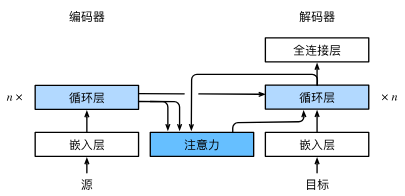
图10.4.1 一个带有Bahdanau注意力的循环神经网络编码器-解码器模型

In [ ]:
import torch
from torch import nn

## 定义注意力解码器

下面看看如何定义Bahdanau注意力，实现循环神经网络编码器-解码器。
其实，我们只需重新定义解码器即可。
为了更方便地显示学习的注意力权重，
以下`AttentionDecoder`类定义了带有注意力机制解码器的基本接口。

In [ ]:
class Decoder(nn.Module):
    """The base decoder interface for the encoder-decoder architecture.

    Defined in :numref:`sec_encoder-decoder`"""
    def __init__(self, **kwargs):
        super(Decoder, self).__init__(**kwargs)

    def init_state(self, enc_outputs, *args):
        raise NotImplementedError

    def forward(self, X, state):
        raise NotImplementedError

class AttentionDecoder(Decoder):
    """带有注意力机制解码器的基本接口"""
    def __init__(self, **kwargs):
        super(AttentionDecoder, self).__init__(**kwargs)

    @property
    def attention_weights(self):
        raise NotImplementedError

接下来，让我们在接下来的`Seq2SeqAttentionDecoder`类中
实现带有Bahdanau注意力的循环神经网络解码器。
首先，初始化解码器的状态，需要下面的输入：

1. 编码器在所有时间步的最终层隐状态，将作为注意力的键和值；
1. 上一时间步的编码器全层隐状态，将作为初始化解码器的隐状态；
1. 编码器有效长度（排除在注意力池中填充词元）。

在每个解码时间步骤中，解码器上一个时间步的最终层隐状态将用作查询。
因此，注意力输出和输入嵌入都连结为循环神经网络解码器的输入。

In [ ]:
def sequence_mask(X, valid_len, value=0):
    """Mask irrelevant entries in sequences.

    Defined in :numref:`sec_seq2seq_decoder`"""
    maxlen = X.size(1)
    mask = torch.arange((maxlen), dtype=torch.float32, device=X.device)[None, :] < valid_len[:, None]
    X[~mask] = value
    return X

def masked_softmax(X, valid_lens):
    """通过在最后一个轴上掩蔽元素来执行softmax操作"""
    # X:3D张量，valid_lens:1D或2D张量
    if valid_lens is None:
        return nn.functional.softmax(X, dim=-1)
    else:
        shape = X.shape
        if valid_lens.dim() == 1:
            valid_lens = torch.repeat_interleave(valid_lens, shape[1])
        else:
            valid_lens = valid_lens.reshape(-1)
        # 最后一轴上被掩蔽的元素使用一个非常大的负值替换，从而其softmax输出为0
        X = sequence_mask(X.reshape(-1, shape[-1]), valid_lens, value=0)
        return nn.functional.softmax(X.reshape(shape), dim=-1)

class AdditiveAttention(nn.Module):
    """Additive attention.

    Defined in :numref:`sec_attention-scoring-functions`"""
    def __init__(self, key_size, query_size, num_hiddens, dropout, **kwargs):
        super(AdditiveAttention, self).__init__(**kwargs)
        self.W_k = nn.Linear(key_size, num_hiddens, bias=False)
        self.W_q = nn.Linear(query_size, num_hiddens, bias=False)
        self.w_v = nn.Linear(num_hiddens, 1, bias=False)
        self.dropout = nn.Dropout(dropout)

    def forward(self, queries, keys, values, valid_lens):
        queries, keys = self.W_q(queries), self.W_k(keys)
        # After dimension expansion, shape of `queries`: (`batch_size`, no. of
        # queries, 1, `num_hiddens`) and shape of `keys`: (`batch_size`, 1,
        # no. of key-value pairs, `num_hiddens`). Sum them up with
        # broadcasting
        features = queries.unsqueeze(2) + keys.unsqueeze(1)
        features = torch.tanh(features)
        # There is only one output of `self.w_v`, so we remove the last
        # one-dimensional entry from the shape. Shape of `scores`:
        # (`batch_size`, no. of queries, no. of key-value pairs)
        scores = self.w_v(features).squeeze(-1)
        self.attention_weights = masked_softmax(scores, valid_lens)
        # Shape of `values`: (`batch_size`, no. of key-value pairs, value
        # dimension)
        return torch.bmm(self.dropout(self.attention_weights), values)

class Seq2SeqAttentionDecoder(AttentionDecoder):
    def __init__(self, vocab_size, embed_size, num_hiddens, num_layers,
                 dropout=0, **kwargs):
        super(Seq2SeqAttentionDecoder, self).__init__(**kwargs)
        self.attention = AdditiveAttention(
            num_hiddens, num_hiddens, num_hiddens, dropout)
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.GRU(
            embed_size + num_hiddens, num_hiddens, num_layers,
            dropout=dropout)
        self.dense = nn.Linear(num_hiddens, vocab_size)

    def init_state(self, enc_outputs, enc_valid_lens, *args):
        # outputs的形状为(batch_size，num_steps，num_hiddens).
        # hidden_state的形状为(num_layers，batch_size，num_hiddens)
        outputs, hidden_state = enc_outputs
        return (outputs.permute(1, 0, 2), hidden_state, enc_valid_lens)

    def forward(self, X, state):
        # enc_outputs的形状为(batch_size,num_steps,num_hiddens).
        # hidden_state的形状为(num_layers,batch_size,
        # num_hiddens)
        enc_outputs, hidden_state, enc_valid_lens = state
        # 输出X的形状为(num_steps,batch_size,embed_size)
        X = self.embedding(X).permute(1, 0, 2)
        outputs, self._attention_weights = [], []
        for x in X:
            # query的形状为(batch_size,1,num_hiddens)
            query = torch.unsqueeze(hidden_state[-1], dim=1)
            # context的形状为(batch_size,1,num_hiddens)
            context = self.attention(
                query, enc_outputs, enc_outputs, enc_valid_lens)
            # 在特征维度上连结
            x = torch.cat((context, torch.unsqueeze(x, dim=1)), dim=-1)
            # 将x变形为(1,batch_size,embed_size+num_hiddens)
            out, hidden_state = self.rnn(x.permute(1, 0, 2), hidden_state)
            outputs.append(out)
            self._attention_weights.append(self.attention.attention_weights)
        # 全连接层变换后，outputs的形状为
        # (num_steps,batch_size,vocab_size)
        outputs = self.dense(torch.cat(outputs, dim=0))
        return outputs.permute(1, 0, 2), [enc_outputs, hidden_state,
                                          enc_valid_lens]

    @property
    def attention_weights(self):
        return self._attention_weights

接下来，使用包含7个时间步的4个序列输入的小批量测试Bahdanau注意力解码器。

In [ ]:
class Encoder(nn.Module):
    """The base encoder interface for the encoder-decoder architecture."""
    def __init__(self, **kwargs):
        super(Encoder, self).__init__(**kwargs)

    def forward(self, X, *args):
        raise NotImplementedError

class Seq2SeqEncoder(Encoder):
    """The RNN encoder for sequence to sequence learning.

    Defined in :numref:`sec_seq2seq`"""
    def __init__(self, vocab_size, embed_size, num_hiddens, num_layers,
                  dropout=0, **kwargs):
        super(Seq2SeqEncoder, self).__init__(**kwargs)
        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.GRU(embed_size, num_hiddens, num_layers,
                          dropout=dropout)

    def forward(self, X, *args):
        # The output `X` shape: (`batch_size`, `num_steps`, `embed_size`)
        X = self.embedding(X)
        # In RNN models, the first axis corresponds to time steps
        X = X.permute(1, 0, 2)
        # When state is not mentioned, it defaults to zeros
        output, state = self.rnn(X)
        # `output` shape: (`num_steps`, `batch_size`, `num_hiddens`)
        # `state` shape: (`num_layers`, `batch_size`, `num_hiddens`)
        return output, state

In [ ]:
encoder = Seq2SeqEncoder(vocab_size=10, embed_size=8, num_hiddens=16, num_layers=2)
encoder.eval()
decoder = Seq2SeqAttentionDecoder(vocab_size=10, embed_size=8, num_hiddens=16, num_layers=2)
decoder.eval()
X = torch.zeros((4, 7), dtype=torch.long)  # (batch_size,num_steps)
state = decoder.init_state(encoder(X), None)
output, state = decoder(X, state)
output.shape, len(state), state[0].shape, len(state[1]), state[1][0].shape

## 训练

与[9.7.4节](./09.recurrent-modern.ipynb#序列到序列学习（seq2seq）)类似，
我们在这里指定超参数，实例化一个带有Bahdanau注意力的编码器和解码器，
并对这个模型进行机器翻译训练。
由于新增的注意力机制，训练要比没有注意力机制的
[9.7.4节](./09.recurrent-modern.ipynb#序列到序列学习（seq2seq）)慢得多。

In [ ]:
def try_gpu(i=0):
    """Return gpu(i) if exists, otherwise return cpu().

    Defined in :numref:`sec_use_gpu`"""
    if torch.cuda.device_count() >= i + 1:
        return torch.device(f'cuda:{i}')
    return torch.device('cpu')

embed_size, num_hiddens, num_layers, dropout = 32, 32, 2, 0.1
batch_size, num_steps = 64, 10
lr, num_epochs, device = 0.005, 250, try_gpu()

In [ ]:
DATA_HUB = dict()
DATA_URL = 'http://d2l-data.s3-accelerate.amazonaws.com/'
DATA_HUB['fra-eng'] = (DATA_URL + 'fra-eng.zip', '94646ad1522d915e7b0f9296181140edcf86a4f5')

def download(name, cache_dir=os.path.join('..', 'data')):
    """Download a file inserted into DATA_HUB, return the local filename.

    Defined in :numref:`sec_kaggle_house`"""
    assert name in DATA_HUB, f"{name} does not exist in {DATA_HUB}."
    url, sha1_hash = DATA_HUB[name]
    os.makedirs(cache_dir, exist_ok=True)
    fname = os.path.join(cache_dir, url.split('/')[-1])
    if os.path.exists(fname):
        sha1 = hashlib.sha1()
        with open(fname, 'rb') as f:
            while True:
                data = f.read(1048576)
                if not data:
                    break
                sha1.update(data)
        if sha1.hexdigest() == sha1_hash:
            return fname  # Hit cache
    print(f'Downloading {fname} from {url}...')
    r = requests.get(url, stream=True, verify=True)
    with open(fname, 'wb') as f:
        f.write(r.content)
    return fname

def download_extract(name, folder=None):
    """Download and extract a zip/tar file.

    Defined in :numref:`sec_kaggle_house`"""
    fname = download(name)
    base_dir = os.path.dirname(fname)
    data_dir, ext = os.path.splitext(fname)
    if ext == '.zip':
        fp = zipfile.ZipFile(fname, 'r')
    elif ext in ('.tar', '.gz'):
        fp = tarfile.open(fname, 'r')
    else:
        assert False, 'Only zip/tar files can be extracted.'
    fp.extractall(base_dir)
    return os.path.join(base_dir, folder) if folder else data_dir

def read_data_nmt():
    """Load the English-French dataset.

    Defined in :numref:`sec_machine_translation`"""
    data_dir = download_extract('fra-eng')
    with open(os.path.join(data_dir, 'fra.txt'), 'r', encoding="UTF-8") as f:
        return f.read()

def preprocess_nmt(text):
    """Preprocess the English-French dataset.

    Defined in :numref:`sec_machine_translation`"""
    def no_space(char, prev_char):
        return char in set(',.!?') and prev_char != ' '

    # Replace non-breaking space with space, and convert uppercase letters to
    # lowercase ones
    text = text.replace('\u202f', ' ').replace('\xa0', ' ').lower()
    # Insert space between words and punctuation marks
    out = [' ' + char if i > 0 and no_space(char, text[i - 1]) else char
           for i, char in enumerate(text)]
    return ''.join(out)

def tokenize_nmt(text, num_examples=None):
    """Tokenize the English-French dataset.

    Defined in :numref:`sec_machine_translation`"""
    source, target = [], []
    for i, line in enumerate(text.split('\n')):
        if num_examples and i > num_examples:
            break
        parts = line.split('\t')
        if len(parts) == 2:
            source.append(parts[0].split(' '))
            target.append(parts[1].split(' '))
    return source, target

def count_corpus(tokens):
    """Count token frequencies.

    Defined in :numref:`sec_text_preprocessing`"""
    # Here `tokens` is a 1D list or 2D list
    if len(tokens) == 0 or isinstance(tokens[0], list):
        # Flatten a list of token lists into a list of tokens
        tokens = [token for line in tokens for token in line]
    return collections.Counter(tokens)

class Vocab:
    """Vocabulary for text."""
    def __init__(self, tokens=None, min_freq=0, reserved_tokens=None):
        """Defined in :numref:`sec_text_preprocessing`"""
        if tokens is None:
            tokens = []
        if reserved_tokens is None:
            reserved_tokens = []
        # Sort according to frequencies
        counter = count_corpus(tokens)
        self._token_freqs = sorted(counter.items(), key=lambda x: x[1],
                                   reverse=True)
        # The index for the unknown token is 0
        self.idx_to_token = ['<unk>'] + reserved_tokens
        self.token_to_idx = {token: idx
                             for idx, token in enumerate(self.idx_to_token)}
        for token, freq in self._token_freqs:
            if freq < min_freq:
                break
            if token not in self.token_to_idx:
                self.idx_to_token.append(token)
                self.token_to_idx[token] = len(self.idx_to_token) - 1

    def __len__(self):
        return len(self.idx_to_token)

    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]

    def to_tokens(self, indices):
        if not isinstance(indices, (list, tuple)):
            return self.idx_to_token[indices]
        return [self.idx_to_token[index] for index in indices]

    @property
    def unk(self):  # Index for the unknown token
        return 0

    @property
    def token_freqs(self):  # Index for the unknown token
        return self._token_freqs

def truncate_pad(line, num_steps, padding_token):
    """Truncate or pad sequences.

    Defined in :numref:`sec_machine_translation`"""
    if len(line) > num_steps:
        return line[:num_steps]  # Truncate
    return line + [padding_token] * (num_steps - len(line))  # Pad

def build_array_nmt(lines, vocab, num_steps):
    """Transform text sequences of machine translation into minibatches.

    Defined in :numref:`subsec_mt_data_loading`"""
    reduce_sum = lambda x, *args, **kwargs: x.sum(*args, **kwargs)
    astype = lambda x, *args, **kwargs: x.type(*args, **kwargs)

    lines = [vocab[l] for l in lines]
    lines = [l + [vocab['<eos>']] for l in lines]
    array = torch.tensor([truncate_pad(
        l, num_steps, vocab['<pad>']) for l in lines])
    valid_len = reduce_sum(
        astype(array != vocab['<pad>'], torch.int32), 1)
    return array, valid_len

def load_array(data_arrays, batch_size, is_train=True):
    """Construct a PyTorch data iterator.

    Defined in :numref:`sec_linear_concise`"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

def load_data_nmt(batch_size, num_steps, num_examples=600):
    """Return the iterator and the vocabularies of the translation dataset.

    Defined in :numref:`subsec_mt_data_loading`"""
    text = preprocess_nmt(read_data_nmt())
    source, target = tokenize_nmt(text, num_examples)
    src_vocab = Vocab(source, min_freq=2,
                          reserved_tokens=['<pad>', '<bos>', '<eos>'])
    tgt_vocab = Vocab(target, min_freq=2,
                          reserved_tokens=['<pad>', '<bos>', '<eos>'])
    src_array, src_valid_len = build_array_nmt(source, src_vocab, num_steps)
    tgt_array, tgt_valid_len = build_array_nmt(target, tgt_vocab, num_steps)
    data_arrays = (src_array, src_valid_len, tgt_array, tgt_valid_len)
    data_iter = load_array(data_arrays, batch_size)
    return data_iter, src_vocab, tgt_vocab

train_iter, src_vocab, tgt_vocab = load_data_nmt(batch_size, num_steps)

In [ ]:
encoder = Seq2SeqEncoder(len(src_vocab), embed_size, num_hiddens, num_layers, dropout)
decoder = Seq2SeqAttentionDecoder(len(tgt_vocab), embed_size, num_hiddens, num_layers, dropout)

In [ ]:
class EncoderDecoder(nn.Module):
    """The base class for the encoder-decoder architecture.

    Defined in :numref:`sec_encoder-decoder`"""
    def __init__(self, encoder, decoder, **kwargs):
        super(EncoderDecoder, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, enc_X, dec_X, *args):
        enc_outputs = self.encoder(enc_X, *args)
        dec_state = self.decoder.init_state(enc_outputs, *args)
        return self.decoder(dec_X, dec_state)

net = EncoderDecoder(encoder, decoder)

In [ ]:
class MaskedSoftmaxCELoss(nn.CrossEntropyLoss):
    """The softmax cross-entropy loss with masks.

    Defined in :numref:`sec_seq2seq_decoder`"""
    # `pred` shape: (`batch_size`, `num_steps`, `vocab_size`)
    # `label` shape: (`batch_size`, `num_steps`)
    # `valid_len` shape: (`batch_size`,)
    def forward(self, pred, label, valid_len):
        weights = torch.ones_like(label)
        weights = sequence_mask(weights, valid_len)
        self.reduction='none'
        unweighted_loss = super(MaskedSoftmaxCELoss, self).forward(
            pred.permute(0, 2, 1), label)
        weighted_loss = (unweighted_loss * weights).mean(dim=1)
        return weighted_loss
        
import time
import numpy as np
class Timer:
    """Record multiple running times."""
    def __init__(self):
        """Defined in :numref:`subsec_linear_model`"""
        self.times = []
        self.start()

    def start(self):
        """Start the timer."""
        self.tik = time.time()

    def stop(self):
        """Stop the timer and record the time in a list."""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """Return the average time."""
        return sum(self.times) / len(self.times)

    def sum(self):
        """Return the sum of time."""
        return sum(self.times)

    def cumsum(self):
        """Return the accumulated time."""
        return np.array(self.times).cumsum().tolist()

class Accumulator:
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        """Defined in :numref:`sec_softmax_scratch`"""
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

def grad_clipping(net, theta):
    """Clip the gradient.

    Defined in :numref:`sec_rnn_scratch`"""
    if isinstance(net, nn.Module):
        params = [p for p in net.parameters() if p.requires_grad]
    else:
        params = net.params
    norm = torch.sqrt(sum(torch.sum((p.grad ** 2)) for p in params))
    if norm > theta:
        for param in params:
            param.grad[:] *= theta / norm

def train_seq2seq(net, data_iter, lr, num_epochs, tgt_vocab, device):
    """Train a model for sequence to sequence.

    Defined in :numref:`sec_seq2seq_decoder`"""
    def xavier_init_weights(m):
        if type(m) == nn.Linear:
            nn.init.xavier_uniform_(m.weight)
        if type(m) == nn.GRU:
            for param in m._flat_weights_names:
                if "weight" in param:
                    nn.init.xavier_uniform_(m._parameters[param])
    net.apply(xavier_init_weights)
    net.to(device)
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    loss = MaskedSoftmaxCELoss()
    net.train()
    for epoch in range(num_epochs):
        timer = Timer()
        metric = Accumulator(2)  # Sum of training loss, no. of tokens
        for batch in data_iter:
            optimizer.zero_grad()
            X, X_valid_len, Y, Y_valid_len = [x.to(device) for x in batch]
            bos = torch.tensor([tgt_vocab['<bos>']] * Y.shape[0],
                                device=device).reshape(-1, 1)
            dec_input = torch.cat([bos, Y[:, :-1]], 1)  # Teacher forcing
            Y_hat, _ = net(X, dec_input, X_valid_len)
            l = loss(Y_hat, Y, Y_valid_len)
            l.sum().backward()  # Make the loss scalar for `backward`
            grad_clipping(net, 1)
            num_tokens = Y_valid_len.sum()
            optimizer.step()
            with torch.no_grad():
                metric.add(l.sum(), num_tokens)
    print(f'loss {metric[0] / metric[1]:.3f}, {metric[1] / timer.stop():.1f} '
          f'tokens/sec on {str(device)}')

train_seq2seq(net, train_iter, lr, num_epochs, tgt_vocab, device)

模型训练后，我们用它将几个英语句子翻译成法语并计算它们的BLEU分数。

In [ ]:
def predict_seq2seq(net, src_sentence, src_vocab, tgt_vocab, num_steps,
                    device, save_attention_weights=False):
    """Predict for sequence to sequence.

    Defined in :numref:`sec_seq2seq_training`"""
    # Set `net` to eval mode for inference
    net.eval()
    src_tokens = src_vocab[src_sentence.lower().split(' ')] + [
        src_vocab['<eos>']]
    enc_valid_len = torch.tensor([len(src_tokens)], device=device)
    src_tokens = truncate_pad(src_tokens, num_steps, src_vocab['<pad>'])
    # Add the batch axis
    enc_X = torch.unsqueeze(
        torch.tensor(src_tokens, dtype=torch.long, device=device), dim=0)
    enc_outputs = net.encoder(enc_X, enc_valid_len)
    dec_state = net.decoder.init_state(enc_outputs, enc_valid_len)
    # Add the batch axis
    dec_X = torch.unsqueeze(torch.tensor(
        [tgt_vocab['<bos>']], dtype=torch.long, device=device), dim=0)
    output_seq, attention_weight_seq = [], []
    for _ in range(num_steps):
        Y, dec_state = net.decoder(dec_X, dec_state)
        # We use the token with the highest prediction likelihood as the input
        # of the decoder at the next time step
        dec_X = Y.argmax(dim=2)
        pred = dec_X.squeeze(dim=0).type(torch.int32).item()
        # Save attention weights (to be covered later)
        if save_attention_weights:
            attention_weight_seq.append(net.decoder.attention_weights)
        # Once the end-of-sequence token is predicted, the generation of the
        # output sequence is complete
        if pred == tgt_vocab['<eos>']:
            break
        output_seq.append(pred)
    return ' '.join(tgt_vocab.to_tokens(output_seq)), attention_weight_seq

def bleu(pred_seq, label_seq, k):
    """Compute the BLEU.

    Defined in :numref:`sec_seq2seq_training`"""
    pred_tokens, label_tokens = pred_seq.split(' '), label_seq.split(' ')
    len_pred, len_label = len(pred_tokens), len(label_tokens)
    score = math.exp(min(0, 1 - len_label / len_pred))
    for n in range(1, k + 1):
        num_matches, label_subs = 0, collections.defaultdict(int)
        for i in range(len_label - n + 1):
            label_subs[' '.join(label_tokens[i: i + n])] += 1
        for i in range(len_pred - n + 1):
            if label_subs[' '.join(pred_tokens[i: i + n])] > 0:
                num_matches += 1
                label_subs[' '.join(pred_tokens[i: i + n])] -= 1
        score *= math.pow(num_matches / (len_pred - n + 1), math.pow(0.5, n))
    return score

engs = ['go .', "i lost .", 'he\'s calm .', 'i\'m home .']
fras = ['va !', 'j\'ai perdu .', 'il est calme .', 'je suis chez moi .']
for eng, fra in zip(engs, fras):
    translation, dec_attention_weight_seq = predict_seq2seq(
        net, eng, src_vocab, tgt_vocab, num_steps, device, True)
    print(f'{eng} => {translation}, ',
          f'bleu {bleu(translation, fra, k=2):.3f}')

In [ ]:
attention_weights = torch.cat([step[0][0][0] for step in dec_attention_weight_seq], 0).reshape((1, 1, -1, num_steps))

训练结束后，下面通过可视化注意力权重
会发现，每个查询都会在键值对上分配不同的权重，这说明
在每个解码步中，输入序列的不同部分被选择性地聚集在注意力池中。

In [ ]:
from matplotlib import pyplot as plt
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(4, 3), cmap='Reds'):
    """显示矩阵热图"""
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize, sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6)

# 加上一个包含序列结束词元
show_heatmaps(
    attention_weights[:, :, :, :len(engs[-1].split()) + 1].cpu(),
    xlabel='Key positions', ylabel='Query positions')

## 小结

* 在预测词元时，如果不是所有输入词元都是相关的，那么具有Bahdanau注意力的循环神经网络编码器-解码器会有选择地统计输入序列的不同部分。这是通过将上下文变量视为加性注意力池化的输出来实现的。
* 在循环神经网络编码器-解码器中，Bahdanau注意力将上一时间步的解码器隐状态视为查询，在所有时间步的编码器隐状态同时视为键和值。

# 多头注意力

在实践中，当给定相同的查询、键和值的集合时，
我们希望模型可以基于相同的注意力机制学习到不同的行为，
然后将不同的行为作为知识组合起来，
捕获序列内各种范围的依赖关系
（例如，短距离依赖和长距离依赖关系）。
因此，允许注意力机制组合使用查询、键和值的不同
*子空间表示*（representation subspaces）可能是有益的。

为此，与其只使用单独一个注意力汇聚，
我们可以用独立学习得到的$h$组不同的
*线性投影*（linear projections）来变换查询、键和值。
然后，这$h$组变换后的查询、键和值将并行地送到注意力汇聚中。
最后，将这$h$个注意力汇聚的输出拼接在一起，
并且通过另一个可以学习的线性投影进行变换，
以产生最终输出。
这种设计被称为*多头注意力*（multihead attention）
(Vaswani et al., 2017)。
对于$h$个注意力汇聚输出，每一个注意力汇聚都被称作一个*头*（head）。
[图10.5.1](#fig.10.5.1)
展示了使用全连接层来实现可学习的线性变换的多头注意力。
>- Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., … Polosukhin, I. (2017). **Attention is all you need**. Advances in neural information processing systems (pp. 5998–6008).

<span id='fig.10.5.1'></span>
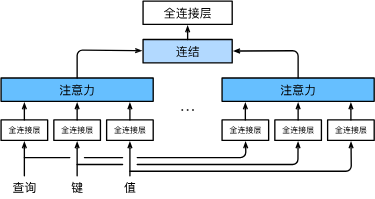
图10.5.1 多头注意力：多个头连结然后线性变换

## 模型

在实现多头注意力之前，让我们用数学语言将这个模型形式化地描述出来。
给定查询$\mathbf{q} \in \mathbb{R}^{d_q}$、
键$\mathbf{k} \in \mathbb{R}^{d_k}$和
值$\mathbf{v} \in \mathbb{R}^{d_v}$，
每个注意力头$\mathbf{h}_i$（$i = 1, \ldots, h$）的计算方法为：

<span id='eq.10.5.1'></span>
$$\tag{10.5.1}
\mathbf{h}_i = f(\mathbf W_i^{(q)}\mathbf q, \mathbf W_i^{(k)}\mathbf k,\mathbf W_i^{(v)}\mathbf v) \in \mathbb R^{p_v},$$

其中，可学习的参数包括
$\mathbf W_i^{(q)}\in\mathbb R^{p_q\times d_q}$、
$\mathbf W_i^{(k)}\in\mathbb R^{p_k\times d_k}$和
$\mathbf W_i^{(v)}\in\mathbb R^{p_v\times d_v}$，
以及代表注意力汇聚的函数$f$。
$f$可以是[10.3节](#注意力评分函数)中的
加性注意力和缩放点积注意力。
多头注意力的输出需要经过另一个线性转换，
它对应着$h$个头连结后的结果，因此其可学习参数是
$\mathbf W_o\in\mathbb R^{p_o\times h p_v}$：

<span id='eq.10.5.2'></span>
$$\tag{10.5.2}
\mathbf W_o \begin{bmatrix}\mathbf h_1\\\vdots\\\mathbf h_h\end{bmatrix} \in \mathbb{R}^{p_o}.$$

基于这种设计，每个头都可能会关注输入的不同部分，
可以表示比简单加权平均值更复杂的函数。

In [ ]:
import math
import torch
from torch import nn

<span id="label_2"></span>
## 实现

在实现过程中通常选择缩放点积注意力作为每一个注意力头。
为了避免计算代价和参数代价的大幅增长，
我们设定$p_q = p_k = p_v = p_o / h$。
值得注意的是，如果将查询、键和值的线性变换的输出数量设置为
$p_q h = p_k h = p_v h = p_o$，
则可以并行计算$h$个头。
在下面的实现中，$p_o$是通过参数`num_hiddens`指定的。

In [ ]:
def sequence_mask(X, valid_len, value=0):
    """Mask irrelevant entries in sequences.

    Defined in :numref:`sec_seq2seq_decoder`"""
    maxlen = X.size(1)
    mask = torch.arange((maxlen), dtype=torch.float32, device=X.device)[None, :] < valid_len[:, None]
    X[~mask] = value
    return X

def masked_softmax(X, valid_lens):
    """通过在最后一个轴上掩蔽元素来执行softmax操作"""
    # X:3D张量，valid_lens:1D或2D张量
    if valid_lens is None:
        return nn.functional.softmax(X, dim=-1)
    else:
        shape = X.shape
        if valid_lens.dim() == 1:
            valid_lens = torch.repeat_interleave(valid_lens, shape[1])
        else:
            valid_lens = valid_lens.reshape(-1)
        # 最后一轴上被掩蔽的元素使用一个非常大的负值替换，从而其softmax输出为0
        X = sequence_mask(X.reshape(-1, shape[-1]), valid_lens, value=0)
        return nn.functional.softmax(X.reshape(shape), dim=-1)

In [ ]:
class DotProductAttention(nn.Module):
    """缩放点积注意力"""
    def __init__(self, dropout, **kwargs):
        super(DotProductAttention, self).__init__(**kwargs)
        self.dropout = nn.Dropout(dropout)

    # queries的形状：(batch_size，查询的个数，d)
    # keys的形状：(batch_size，“键－值”对的个数，d)
    # values的形状：(batch_size，“键－值”对的个数，值的维度)
    # valid_lens的形状:(batch_size，)或者(batch_size，查询的个数)
    def forward(self, queries, keys, values, valid_lens=None):
        d = queries.shape[-1]
        # 设置transpose_b=True为了交换keys的最后两个维度
        scores = torch.bmm(queries, keys.transpose(1,2)) / math.sqrt(d)
        self.attention_weights = masked_softmax(scores, valid_lens)
        return torch.bmm(self.dropout(self.attention_weights), values)

class MultiHeadAttention(nn.Module):
    """多头注意力"""
    def __init__(self, key_size, query_size, value_size, num_hiddens,
                 num_heads, dropout, bias=False, **kwargs):
        super(MultiHeadAttention, self).__init__(**kwargs)
        self.num_heads = num_heads
        self.attention = DotProductAttention(dropout)
        self.W_q = nn.Linear(query_size, num_hiddens, bias=bias)
        self.W_k = nn.Linear(key_size, num_hiddens, bias=bias)
        self.W_v = nn.Linear(value_size, num_hiddens, bias=bias)
        self.W_o = nn.Linear(num_hiddens, num_hiddens, bias=bias)

    def forward(self, queries, keys, values, valid_lens):
        # queries，keys，values的形状:
        # (batch_size，查询或者“键－值”对的个数，num_hiddens)
        # valid_lens　的形状:
        # (batch_size，)或(batch_size，查询的个数)
        # 经过变换后，输出的queries，keys，values　的形状:
        # (batch_size*num_heads，查询或者“键－值”对的个数，
        # num_hiddens/num_heads)
        queries = transpose_qkv(self.W_q(queries), self.num_heads)
        keys = transpose_qkv(self.W_k(keys), self.num_heads)
        values = transpose_qkv(self.W_v(values), self.num_heads)
        print("queries size = ", queries.shape)
        print("keys size = ", keys.shape)
        print("values size = ", values.shape)

        if valid_lens is not None:
            # 在轴0，将第一项（标量或者矢量）复制num_heads次，
            # 然后如此复制第二项，然后诸如此类。
            valid_lens = torch.repeat_interleave(valid_lens, repeats=self.num_heads, dim=0)

        # output的形状:(batch_size*num_heads，查询的个数，
        # num_hiddens/num_heads)
        output = self.attention(queries, keys, values, valid_lens)

        # output_concat的形状:(batch_size，查询的个数，num_hiddens)
        output_concat = transpose_output(output, self.num_heads)
        return self.W_o(output_concat)

为了能够使多个头并行计算，
上面的`MultiHeadAttention`类将使用下面定义的两个转置函数。
具体来说，`transpose_output`函数反转了`transpose_qkv`函数的操作。

In [ ]:
def transpose_qkv(X, num_heads):
    """为了多注意力头的并行计算而变换形状"""
    # 输入X的形状:(batch_size，查询或者“键－值”对的个数，num_hiddens)
    # 输出X的形状:(batch_size，查询或者“键－值”对的个数，num_heads，
    # num_hiddens/num_heads)
    X = X.reshape(X.shape[0], X.shape[1], num_heads, -1)

    # 输出X的形状:(batch_size，num_heads，查询或者“键－值”对的个数,
    # num_hiddens/num_heads)
    X = X.permute(0, 2, 1, 3)

    # 最终输出的形状:(batch_size*num_heads,查询或者“键－值”对的个数,
    # num_hiddens/num_heads)
    return X.reshape(-1, X.shape[2], X.shape[3])

def transpose_output(X, num_heads):
    """逆转transpose_qkv函数的操作"""
    X = X.reshape(-1, num_heads, X.shape[1], X.shape[2])
    X = X.permute(0, 2, 1, 3)
    return X.reshape(X.shape[0], X.shape[1], -1)

下面使用键和值相同的小例子来测试我们编写的`MultiHeadAttention`类。
多头注意力输出的形状是（`batch_size`，`num_queries`，`num_hiddens`）。

In [ ]:
num_hiddens, num_heads = 100, 5
attention = MultiHeadAttention(num_hiddens, num_hiddens, num_hiddens, num_hiddens, num_heads, 0.5)
attention.eval()

In [ ]:
batch_size, num_queries = 2, 4
num_kvpairs, valid_lens =  6, torch.tensor([3, 2])
X = torch.ones((batch_size, num_queries, num_hiddens))
Y = torch.ones((batch_size, num_kvpairs, num_hiddens))
attention(X, Y, Y, valid_lens).shape

> MultiHeadAttention 计算流:  
> 1.queries, keys, values 初始化

In [ ]:
batch_size = 2
num_queries = 4
num_kvpairs = 5
query_size = key_size = value_size = num_hiddens = 9
valid_lens = torch.tensor([3, 2])
num_heads = 3
bias = False

X = torch.ones((batch_size, num_queries, num_hiddens))
Y = torch.ones((batch_size, num_kvpairs, num_hiddens))
queries, keys, values = X, Y, Y
print("queries size = ", queries.shape)
print("num of batches = ", batch_size, ", number of queries = ", num_queries, ", each query length = ", query_size)
print("keys size = ", keys.shape)
print("num of batches = ", batch_size, ", number of key-value pairs = ", num_kvpairs, ", each key length = ", key_size)
print("values size = ", values.shape)
print("num of batches = ", batch_size, ", number of key-value pairs = ", num_kvpairs, ", each value length = ", value_size)

In [ ]:
W_q = nn.Linear(query_size, num_hiddens, bias=bias)
W_k = nn.Linear(key_size, num_hiddens, bias=bias)
W_v = nn.Linear(value_size, num_hiddens, bias=bias)
print("Linear layer W_q = ", W_q)
print("Linear layer W_k = ", W_k)
print("Linear layer W_v = ", W_v)

> 2.transpose_qkv

In [ ]:
def transpose_qkv(X, num_heads):
    """为了多注意力头的并行计算而变换形状"""
    # 输入X的形状:(batch_size，查询或者“键－值”对的个数，num_hiddens)
    # 输出X的形状:(batch_size，查询或者“键－值”对的个数，num_heads，num_hiddens/num_heads)
    X = X.reshape(X.shape[0], X.shape[1], num_heads, -1)

    # 输出X的形状:(batch_size，num_heads，查询或者“键－值”对的个数,
    # num_hiddens/num_heads)
    X = X.permute(0, 2, 1, 3)

    # 最终输出的形状:(batch_size*num_heads,查询或者“键－值”对的个数,
    # num_hiddens/num_heads)
    return X.reshape(-1, X.shape[2], X.shape[3])
X = W_q(queries)
print("input size =", X.shape)
print("batch size =", batch_size, ", number of queries =", num_queries, ", number of hiddens =", num_hiddens)
X = X.reshape(X.shape[0], X.shape[1], num_heads, -1)
print("size after reshape =", X.shape)
print("batch size =", batch_size, ", number of queries =", num_queries,
      ", number of heads =", num_heads, ", number of hiddens / number of heads =", num_hiddens / num_heads)
X = X.permute(0, 2, 1, 3)
print("size after permute =", X.shape)
X = X.reshape(-1, X.shape[2], X.shape[3])
print("output size =", X.shape)
print("batch size * number of heads =", batch_size * num_heads, ", number of queries =", num_queries,
      ", number of hiddens / number of heads =", num_hiddens/num_heads)

In [ ]:
queries = transpose_qkv(W_q(queries), num_heads)
keys = transpose_qkv(W_k(keys), num_heads)
values = transpose_qkv(W_v(values), num_heads)
print("queries size after transpose_qkv() = ", queries.shape)
print("keys size after transpose_qkv() = ", keys.shape)
print("values size after transpose_qkv() = ", values.shape)

>3. DotProductAttention<br>
same to [DotProductAttention 计算流 2-4](#label_1)

In [ ]:
if valid_lens is not None:
    # 在轴0，将第一项（标量或者矢量）复制num_heads次，
    # 然后如此复制第二项，然后诸如此类。
    valid_lens = torch.repeat_interleave(valid_lens, repeats=num_heads, dim=0)
print("valid_lens = ", valid_lens)

In [ ]:
d = queries.shape[-1]
scores = torch.bmm(queries, keys.transpose(1,2)) / math.sqrt(d)
print("queries size = ", queries.shape)
print("keys^T size = ", keys.transpose(1,2).shape)
print("scores size = ", scores.shape)
print(scores)
print(scores.sum(dim=2))

In [ ]:
print("valid_lens = ", valid_lens)
# attention_weights = masked_softmax(scores, valid_lens)
X, valid_lens = scores, valid_lens
shape = X.shape
valid_lens = torch.repeat_interleave(valid_lens, shape[1])
print("repeated valid_lens = ", valid_lens, "\n")

X, valid_len = X.reshape(-1, shape[-1]), valid_lens
maxlen = X.size(1)
mask = torch.arange((maxlen), dtype=torch.float32, device=X.device)[None, :] < valid_len[:, None]
print("mask = ", mask)

value = 0
X[~mask] = value
print("X = ", X, "\n")

attention_weights = nn.functional.softmax(X.reshape(shape), dim=-1)
print("attention_weights size =", attention_weights.shape)
print(attention_weights)
print(attention_weights.sum(dim=2))

In [ ]:
dropout = nn.Dropout(0.5)
output = torch.bmm(dropout(attention_weights), values)
print("dropout(attention_weights) size = ", dropout(attention_weights).shape)
print("values size = ", values.shape)
print("output size = ", output.shape)

>4. transpose_output(i.e., inverse operation of transpose_qkv)

In [ ]:
def transpose_output(X, num_heads):
    """逆转transpose_qkv函数的操作"""
    X = X.reshape(-1, num_heads, X.shape[1], X.shape[2])
    X = X.permute(0, 2, 1, 3)
    return X.reshape(X.shape[0], X.shape[1], -1)

output_concat = transpose_output(output, num_heads)
print("output_concat size = ", output_concat.shape)

> note:<br>
相对于DotProductAttention(i.e., single-head attention), Multi-head attention 的 `num of batches` 增大到原来的 `number of heads` 倍, `query/key/value length` 减少到原来的 `1 / number of heads`
variable | DotProductAttention size | VS | MultiHeadAttention size
:-: | :-: | :-: | :-:
queries | (num of batches, number of queries, each query length) | $\to$ | (num of batches * number of heads, number of queries, each query length / number of heads)
keys | (num of batches, number of key-value pairs, each key length) | $\to$ | (num of batches * number of heads, number of key-value pairs, each key length / number of heads)
values | (num of batches, number of key-value pairs, each value length) | $\to$ | (num of batches * number of heads, number of key-value pairs, each value length / number of heads)

## 小结

* 多头注意力融合了来自于多个注意力汇聚的不同知识，这些知识的不同来源于相同的查询、键和值的不同的子空间表示。
* <font color="red">基于适当的张量操作，可以实现多头注意力的并行计算</font>。

# 自注意力和位置编码
https://zh.d2l.ai/chapter_attention-mechanisms/self-attention-and-positional-encoding.html

在深度学习中，经常使用卷积神经网络（CNN）或循环神经网络（RNN）对序列进行编码。
想象一下，有了注意力机制之后，我们将词元序列输入注意力池化中，
以便同一组词元同时充当查询、键和值。
具体来说，<font color="red">每个查询都会关注所有的键－值对并生成一个注意力输出。
由于查询、键和值来自同一组输入，因此被称为
<u>*自注意力</u>*(self-attention)</font>
 (Lin et al., 2017, Vaswani et al., 2017)，
<font color="red">也被称为<u>*内部注意力*</u>(intra-attention)</font>(Cheng et al., 2016, Parikh et al., 2016, Paulus et al., 2017)。
本节将使用自注意力进行序列编码，以及如何使用序列的顺序作为补充信息。
>- Lin, Z., Feng, M., Santos, C. N. d., Yu, M., Xiang, B., Zhou, B., & Bengio, Y. (2017). **A structured self-attentive sentence embedding**. arXiv preprint arXiv:1703.03130.
>- Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., … Polosukhin, I. (2017). **Attention is all you need**. Advances in neural information processing systems (pp. 5998–6008).
>- Cheng, J., Dong, L., & Lapata, M. (2016). **Long short-term memory-networks for machine reading**. Proceedings of the 2016 Conference on Empirical Methods in Natural Language Processing (pp. 551–561).
>- Parikh, A. P., Täckström, O., Das, D., & Uszkoreit, J. (2016). **A decomposable attention model for natural language inference**. arXiv preprint arXiv:1606.01933.
>- Paulus, R., Xiong, C., & Socher, R. (2017). **A deep reinforced model for abstractive summarization**. arXiv preprint arXiv:1705.04304.






In [ ]:
import math
import torch
from torch import nn

## 自注意力

给定一个由词元组成的输入序列$\mathbf{x}_1, \ldots, \mathbf{x}_n$，
其中任意$\mathbf{x}_i \in \mathbb{R}^d$（$1 \leq i \leq n$）。
该序列的自注意力输出为一个长度相同的序列
$\mathbf{y}_1, \ldots, \mathbf{y}_n$，其中：

<span id='eq.10.6.1'></span>
$$\tag{10.6.1}
\mathbf{y}_i = f(\mathbf{x}_i, (\mathbf{x}_1, \mathbf{x}_1), \ldots, (\mathbf{x}_n, \mathbf{x}_n)) \in \mathbb{R}^d$$

根据[(10.2.4)](#eq.10.2.4)中定义的注意力汇聚函数$f$。
下面的代码片段是基于多头注意力对一个张量完成自注意力的计算，
张量的形状为（批量大小，时间步的数目或词元序列的长度，$d$）。
输出与输入的张量形状相同。

> note:
>1. 在执行下列代码之前需要执行[10.5.2节](#label_2)中定义的`MultiHeadAttention`类
2. 与多头注意力实现不同之处: 自注意力的`queries, keys, values`均来自同一组输入

In [ ]:
num_hiddens, num_heads = 100, 5
attention = MultiHeadAttention(num_hiddens, num_hiddens, num_hiddens, num_hiddens, num_heads, 0.5)
attention.eval()

In [ ]:
batch_size, num_queries, valid_lens = 2, 4, torch.tensor([3, 2])
X = torch.ones((batch_size, num_queries, num_hiddens))
attention(X, X, X, valid_lens).shape

## 比较卷积神经网络、循环神经网络和自注意力

接下来比较下面几个架构，目标都是将由$n$个词元组成的序列映射到另一个长度相等的序列，其中的每个输入词元或输出词元都由$d$维向量表示。具体来说，将比较的是卷积神经网络、循环神经网络和自注意力这几个架构的计算复杂性、顺序操作和最大路径长度。请注意，<font color="red">顺序操作会妨碍并行计算，而任意的序列位置组合之间的路径越短，则能更轻松地学习序列中的远距离依赖关系</font>(Hochreiter et al., 2001)。
>- Hochreiter, S., Bengio, Y., Frasconi, P., Schmidhuber, J., & others (2001). **Gradient flow in recurrent nets: the difficulty of learning long-term dependencies**.

<span id='fig.10.6.1'></span>
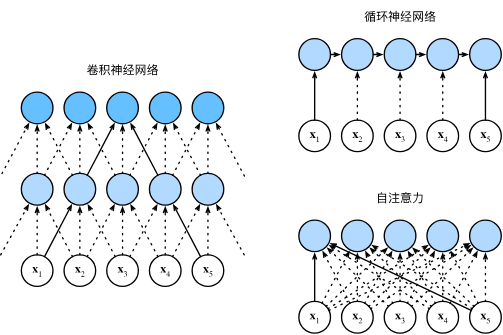
图10.6.1 比较卷积神经网络（填充词元被忽略）、循环神经网络和自注意力三种架构

考虑一个卷积核大小为$k$的卷积层。
在后面的章节将提供关于使用卷积神经网络处理序列的更多详细信息。
目前只需要知道的是，由于序列长度是$n$，输入和输出的通道数量都是$d$，
所以卷积层的计算复杂度为$\mathcal{O}(knd^2)$。
如[图10.6.1](#fig.10.6.1)所示，
卷积神经网络是分层的，因此为有$\mathcal{O}(1)$个顺序操作，
最大路径长度为$\mathcal{O}(n/k)$。
例如，$\mathbf{x}_1$和$\mathbf{x}_5$处于[图10.6.1](#fig.10.6.1)中卷积核大小为3的双层卷积神经网络的感受野内。

当更新循环神经网络的隐状态时，
$d \times d$权重矩阵和$d$维隐状态的乘法计算复杂度为$\mathcal{O}(d^2)$。
由于序列长度为$n$，因此循环神经网络层的计算复杂度为$\mathcal{O}(nd^2)$。
根据[图10.6.1](#fig.10.6.1)，
有$\mathcal{O}(n)$个顺序操作无法并行化，最大路径长度也是$\mathcal{O}(n)$。

在自注意力中，查询、键和值都是$n \times d$矩阵。
考虑[(10.3.5)](#eq.10.3.5)中缩放的”点－积“注意力，
其中$n \times d$矩阵乘以$d \times n$矩阵。
之后输出的$n \times n$矩阵乘以$n \times d$矩阵。
因此，自注意力具有$\mathcal{O}(n^2d)$计算复杂性。
正如在[图10.6.1](#fig.10.6.1)中所讲，
每个词元都通过自注意力直接连接到任何其他词元。
因此，有$\mathcal{O}(1)$个顺序操作可以并行计算，
最大路径长度也是$\mathcal{O}(1)$。

总而言之，卷积神经网络和自注意力都拥有并行计算的优势，
而且自注意力的最大路径长度最短。
但是因为其计算复杂度是关于序列长度的二次方，所以在很长的序列中计算会非常慢。

模型 | 计算复杂度 | 顺序操作 | 最大路径长度
:-: | :-: | :-: | :-:
卷积神经网络 | $\mathcal{O}(knd^2)$ | $\mathcal{O}(1)$ | $\mathcal{O}(n/k)$
循环神经网络 | $\mathcal{O}(nd^2)$ | $\mathcal{O}(n)$ | $\mathcal{O}(n)$
自注意力 | $\mathcal{O}(n^2d)$ | $\mathcal{O}(1)$ | $\mathcal{O}(1)$

todo: [矩阵乘法复杂度分析](https://blog.csdn.net/qq_39463175/article/details/111818717)

## 位置编码

在处理词元序列时，循环神经网络是逐个的重复地处理词元的，
而自注意力则因为并行计算而放弃了顺序操作。
为了使用序列的顺序信息，通过在输入表示中添加
*位置编码*（positional encoding）来注入绝对的或相对的位置信息。
位置编码可以通过学习得到也可以直接固定得到。
接下来描述的是基于正弦函数和余弦函数的固定位置编码(Vaswani et al., 2017)。
>- Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., … Polosukhin, I. (2017). **Attention is all you need**. Advances in neural information processing systems (pp. 5998–6008).

假设输入表示$\mathbf{X} \in \mathbb{R}^{n \times d}$
包含一个序列中$n$个词元的$d$维嵌入表示。
位置编码使用相同形状的位置嵌入矩阵
$\mathbf{P} \in \mathbb{R}^{n \times d}$输出$\mathbf{X} + \mathbf{P}$，
矩阵第$i$行、第$2j$列和$2j+1$列上的元素为：

<span id='eq.10.6.2'></span>
$$\tag{10.6.2}
\begin{aligned} p_{i, 2j} &= \sin\left(\frac{i}{10000^{\frac{2j}{d}}}\right),\\p_{i, 2j+1} &= \cos\left(\frac{i}{10000^{\frac{2j}{d}}}\right).\end{aligned}$$

乍一看，这种基于三角函数的设计看起来很奇怪。
在解释这个设计之前，让我们先在下面的`PositionalEncoding`类中实现它。

todo: "一个序列中$n$个词元的$d$维嵌入"：$n$个词元 对应自注意力中的 key-value pairs数量？$d$维嵌入 对应 key length?

In [ ]:
class PositionalEncoding(nn.Module):
    """位置编码"""
    def __init__(self, num_hiddens, dropout, max_len=1000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(dropout)
        # 创建一个足够长的P
        self.P = torch.zeros((1, max_len, num_hiddens))
        X = torch.arange(max_len, dtype=torch.float32).reshape(
            -1, 1) / torch.pow(10000, torch.arange(
            0, num_hiddens, 2, dtype=torch.float32) / num_hiddens)
        self.P[:, :, 0::2] = torch.sin(X)
        self.P[:, :, 1::2] = torch.cos(X)

    def forward(self, X):
        X = X + self.P[:, :X.shape[1], :].to(X.device)
        return self.dropout(X)

<font color="red">在位置嵌入矩阵$\mathbf{P}$中，
行代表词元在序列中的位置，列代表位置编码的不同维度</font>。
从下面的例子中可以看到位置嵌入矩阵的第$6$列和第$7$列的频率高于第$8$列和第$9$列。
第$6$列和第$7$列之间的偏移量（第$8$列和第$9$列相同）是由于正弦函数和余弦函数的交替。

In [ ]:
encoding_dim, num_steps = 32, 60
pos_encoding = PositionalEncoding(encoding_dim, 0)
pos_encoding.eval()
X = pos_encoding(torch.zeros((1, num_steps, encoding_dim)))

In [ ]:
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline

def set_figsize(figsize=(3.5, 2.5)):
    """Set the figure size for matplotlib.

    Defined in :numref:`sec_calculus`"""
    backend_inline.set_matplotlib_formats('svg')
    plt.rcParams['figure.figsize'] = figsize

def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib.

    Defined in :numref:`sec_calculus`"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """Plot data points.

    Defined in :numref:`sec_calculus`"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else plt.gca()

    # Return True if `X` (tensor or list) has 1 axis
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

In [ ]:
P = pos_encoding.P[:, :X.shape[1], :]
print("P size =", P.shape)
print("P[0, :, 6:10].T size =", P[0, :, 6:10].T.shape) 

In [ ]:
# 绘制 位置嵌入矩阵P 的6-9列，每列数据中 j 相同, i 不同
plot(torch.arange(num_steps), P[0, :, 6:10].T, xlabel='Row (position)',
     figsize=(6, 2.5), legend=["Col %d" % d for d in torch.arange(6, 10)])

> PositionalEncoding 计算流:
> 1. init(准备位置嵌入矩阵P)

In [ ]:
num_steps = 4 # n个词元
encoding_dim = 6 # d维嵌入
assert(encoding_dim % 2 == 0)
num_hiddens = encoding_dim # d维嵌入
max_len = 8

$$ X = \frac{i}{10000^{\frac{2j}{d}}}$$

In [ ]:
numerator = torch.arange(max_len, dtype=torch.float32).reshape(-1, 1)
denominator = torch.pow(10000, torch.arange(0, num_hiddens, 2, dtype=torch.float32) / num_hiddens)
X = numerator / denominator
print("numerator size =", numerator.shape)
print(numerator)
print("denominator size =", denominator.shape)
print(denominator)
print("X size =", X.shape)
print(X)

In [ ]:
P2 = torch.zeros((1, max_len, num_hiddens))
print("P size =", P2.shape)

$$ p_{i, 2j} = \sin\left(\frac{i}{10000^{\frac{2j}{d}}}\right) $$

In [ ]:
P2[:, :, 0::2] = torch.sin(X) # 填充偶数列
print("P =", P2)

$$ p_{i, 2j+1} = \cos\left(\frac{i}{10000^{\frac{2j}{d}}}\right) $$

In [ ]:
P2[:, :, 1::2] = torch.cos(X) # 填充奇数列
print("P =", P2)

> 2.forward(计算入口)

In [ ]:
X = torch.zeros((1, num_steps, encoding_dim))
print(X.shape)
print("X.device =", X.device)
X = X + P2[:, :X.shape[1], :].to(X.device)
print("X =", X)

> **note**:<br>
输入$\mathbf{X} \in \mathbb{R}^{n \times d}$ 和位置嵌入矩阵$\mathbf{P} \in \mathbb{R}^{n \times d}$均为$n$行($n$个词元)$d$列($d$维嵌入)矩阵。行代表词元在序列中的位置，列代表位置编码的不同维度。  
以$i_1$, $i_2$, $i_3$, $i_4$ 行 $2j_1$, $2j_1 + 1$, $2j_2$, $2j_2 + 1$列为例, 其中$i_1 < i_2 < i_3 < i_4 < n$, $2j_1 < 2j_1 + 1 < 2j_2 < 2j_2 + 1 < d$,  
位置嵌入矩阵$\mathbf{P}$的结构如下:
$$\begin{array}{c|cccc}
P & 2j_1 & 2j_1 + 1 & 2j_2 & 2j_2 + 1\\
\hline
i_1 & \sin\left(\frac{i_1}{10000^{\frac{2j_1}{d}}}\right) & \cos\left(\frac{i_1}{10000^{\frac{2j_1}{d}}}\right) & \sin\left(\frac{i_1}{10000^{\frac{2j_2}{d}}}\right) & \cos\left(\frac{i_1}{10000^{\frac{2j_2}{d}}}\right) \\
i_2 & \sin\left(\frac{i_2}{10000^{\frac{2j_1}{d}}}\right) & \cos\left(\frac{i_2}{10000^{\frac{2j_1}{d}}}\right) & \sin\left(\frac{i_2}{10000^{\frac{2j_2}{d}}}\right) & \cos\left(\frac{i_2}{10000^{\frac{2j_2}{d}}}\right) \\
i_3 & \sin\left(\frac{i_3}{10000^{\frac{2j_1}{d}}}\right) & \cos\left(\frac{i_3}{10000^{\frac{2j_1}{d}}}\right) & \sin\left(\frac{i_3}{10000^{\frac{2j_2}{d}}}\right) & \cos\left(\frac{i_3}{10000^{\frac{2j_2}{d}}}\right) \\
i_4 & \sin\left(\frac{i_4}{10000^{\frac{2j_1}{d}}}\right) & \cos\left(\frac{i_4}{10000^{\frac{2j_1}{d}}}\right) & \sin\left(\frac{i_4}{10000^{\frac{2j_2}{d}}}\right) & \cos\left(\frac{i_4}{10000^{\frac{2j_2}{d}}}\right) \\
\end{array}$$

### 绝对位置信息

为了明白沿着编码维度单调降低的频率与绝对位置信息的关系，
让我们打印出$0, 1, \ldots, 7$的二进制表示形式。
正如所看到的，每个数字、每两个数字和每四个数字上的比特值
在第一个最低位、第二个最低位和第三个最低位上分别交替。

In [ ]:
for i in range(8):
    print(f'{i}的二进制是：{i:>03b}')

在二进制表示中，较高比特位的交替频率低于较低比特位，
与下面的热图所示相似，只是位置编码通过使用三角函数在编码维度上降低频率。
由于输出是浮点数，因此此类连续表示比二进制表示法更节省空间。(todo: 这一段该如何理解?)

In [ ]:
from matplotlib import pyplot as plt
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(4, 3), cmap='Reds'):
    """显示矩阵热图"""
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize, sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap)
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6)

# P = P[0, :, :].unsqueeze(0).unsqueeze(0)
show_heatmaps(P[0, :, :].unsqueeze(0).unsqueeze(0),
              xlabel='Column (encoding dimension)',
              ylabel='Row (position)', figsize=(3.5, 4), cmap='Blues')

### 相对位置信息

除了捕获绝对位置信息之外，上述的位置编码还允许模型学习得到输入序列中相对位置信息。
这是因为对于任何确定的位置偏移$\delta$，位置$i + \delta$处
的位置编码可以线性投影位置$i$处的位置编码来表示。

这种投影的数学解释是，令$\omega_j = 1/10000^{2j/d}$，
<font color="red">对于任何确定的位置偏移$\delta$，
[(10.6.2)](#eq.10.6.2)中的任何一对
$(p_{i, 2j}, p_{i, 2j+1})$都可以线性投影到
$(p_{i+\delta, 2j}, p_{i+\delta, 2j+1})$</font>：

<span id='eq.10.6.3'></span>
$$\tag{10.6.3}
\begin{aligned}
&\begin{bmatrix} \cos(\delta \omega_j) & \sin(\delta \omega_j) \\  -\sin(\delta \omega_j) & \cos(\delta \omega_j) \\ \end{bmatrix}
\begin{bmatrix} p_{i, 2j} \\  p_{i, 2j+1} \\ \end{bmatrix}\\
=&\begin{bmatrix} \cos(\delta \omega_j) \sin(i \omega_j) + \sin(\delta \omega_j) \cos(i \omega_j) \\  -\sin(\delta \omega_j) \sin(i \omega_j) + \cos(\delta \omega_j) \cos(i \omega_j) \\ \end{bmatrix}\\
=&\begin{bmatrix} \sin\left((i+\delta) \omega_j\right) \\  \cos\left((i+\delta) \omega_j\right) \\ \end{bmatrix}\\
=& 
\begin{bmatrix} p_{i+\delta, 2j} \\  p_{i+\delta, 2j+1} \\ \end{bmatrix},
\end{aligned}$$

$2\times 2$投影矩阵不依赖于任何位置的索引$i$。

## 小结

* 在自注意力中，查询、键和值都来自同一组输入。
* <font color="red">卷积神经网络和自注意力都拥有并行计算的优势，而且自注意力的最大路径长度最短。但是因为其计算复杂度是关于序列长度的二次方，所以在很长的序列中计算会非常慢</font>。
* 为了使用序列的顺序信息，可以通过在输入表示中添加位置编码，来注入绝对的或相对的位置信息。

# Transformer
https://zh.d2l.ai/chapter_attention-mechanisms/transformer.html

[10.6.2节](#比较卷积神经网络、循环神经网络和自注意力)中比较了卷积神经网络（CNN）、循环神经网络（RNN）和自注意力（self-attention）。值得注意的是，自注意力同时具有并行计算和最短的最大路径长度这两个优势。因此，使用自注意力来设计深度架构是很有吸引力的。对比之前仍然依赖循环神经网络实现输入表示的自注意力模型(Cheng et al., 2016, Lin et al., 2017, Paulus et al., 2017)，Transformer模型完全基于注意力机制，没有任何卷积层或循环神经网络层(Vaswani et al., 2017)。尽管Transformer最初是应用于在文本数据上的序列到序列学习，但现在已经推广到各种现代的深度学习中，例如语言、视觉、语音和强化学习领域。
>- Cheng, J., Dong, L., & Lapata, M. (2016). **Long short-term memory-networks for machine reading**. Proceedings of the 2016 Conference on Empirical Methods in Natural Language Processing (pp. 551–561).
>- Lin, Z., Feng, M., Santos, C. N. d., Yu, M., Xiang, B., Zhou, B., & Bengio, Y. (2017). **A structured self-attentive sentence embedding**. arXiv preprint arXiv:1703.03130.
>- Paulus, R., Xiong, C., & Socher, R. (2017). **A deep reinforced model for abstractive summarization**. arXiv preprint arXiv:1705.04304.
>- Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., … Polosukhin, I. (2017). **Attention is all you need**. Advances in neural information processing systems (pp. 5998–6008).

## 模型

Transformer作为编码器－解码器架构的一个实例，其整体架构图在[图10.7.1](#fig.10.7.1)中展示。正如所见到的，Transformer是由编码器和解码器组成的。与[图10.4.1](#fig.10.4.1)中基于Bahdanau注意力实现的序列到序列的学习相比，Transformer的编码器和解码器是基于自注意力的模块叠加而成的，<font color="red">源（输入）序列和目标（输出）序列的*嵌入*（embedding）表示将加上*位置编码*（positional encoding），再分别输入到编码器和解码器中</font>。

<span id='fig.10.7.1'></span>
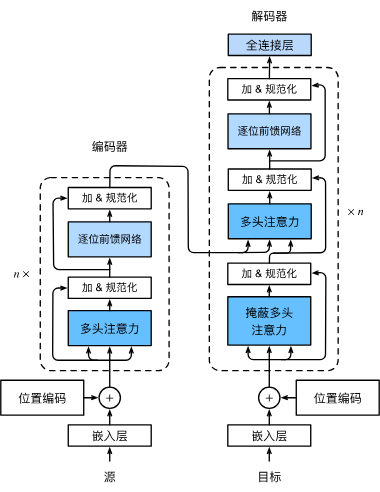
图10.7.1 transformer架构

[图10.7.1](#fig.10.7.1)中概述了Transformer的架构。从宏观角度来看，Transformer的<font color="red">**编码器**</font>是由多个相同的层叠加而成的，<font color="red">每个层都有两个子层（子层表示为$\mathrm{sublayer}$）。第一个子层是*多头自注意力*（multi-head self-attention）汇聚；第二个子层是*基于位置的前馈网络*（positionwise feed-forward network）</font>。具体来说，<font color="red">在计算编码器的自注意力时，查询、键和值都来自前一个编码器层的输出</font>。受[7.6节](./07.convolutional-modern.ipynb)(todo)中残差网络的启发，<font color="red">每个子层都采用了*残差连接*（residual connection）</font>。在Transformer中，对于序列中任何位置的任何输入$\mathbf{x} \in \mathbb{R}^d$，都要求满足$\mathrm{sublayer}(\mathbf{x}) \in \mathbb{R}^d$，以便残差连接满足$\mathbf{x} + \mathrm{sublayer}(\mathbf{x}) \in \mathbb{R}^d$。<font color="red">在残差连接的加法计算之后，紧接着应用*层规范化*（layer normalization）</font>(Ba et al., 2016)。因此，输入序列对应的每个位置，Transformer编码器都将输出一个$d$维表示向量。
>- Ba, J. L., Kiros, J. R., & Hinton, G. E. (2016). **Layer normalization**. arXiv preprint arXiv:1607.06450.

Transformer<font color="red">**解码器**</font>也是由多个相同的层叠加而成的，并且层中使用了残差连接和层规范化。除了编码器中描述的两个子层之外，解码器还在这两个子层之间插入了第三个子层，称为*编码器－解码器注意力*（encoder-decoder attention）层。<font color="red">在编码器－解码器注意力中，查询来自前一个解码器层的输出，而键和值来自整个编码器的输出</font>。<font color="blue">在解码器自注意力中，查询、键和值都来自上一个解码器层的输出。但是，解码器中的每个位置只能考虑该位置之前的所有位置。这种*掩蔽*（masked）注意力保留了*自回归*（auto-regressive）属性，确保预测仅依赖于已生成的输出词元</font>。

在此之前已经描述并实现了基于缩放点积多头注意力[10.5节](#多头注意力)和位置编码[10.6.3节](#位置编码)。接下来将实现Transformer模型的剩余部分。

In [ ]:
import math
import pandas as pd
import torch
from torch import nn

## 基于位置的前馈网络

基于位置的前馈网络<font color="red">对序列中的所有位置的表示进行变换时使用的是同一个多层感知机（MLP）</font>，这就是称前馈网络是*基于位置的*（positionwise）的原因。在下面的实现中，输入$X$的形状（批量大小，时间步数或序列长度，隐单元数或特征维度）将被一个两层的感知机转换成形状为（批量大小，时间步数，ffn_num_outputs）的输出张量。

In [ ]:
class PositionWiseFFN(nn.Module):
    """基于位置的前馈网络"""
    def __init__(self, ffn_num_input, ffn_num_hiddens, ffn_num_outputs,
                 **kwargs):
        super(PositionWiseFFN, self).__init__(**kwargs)
        self.dense1 = nn.Linear(ffn_num_input, ffn_num_hiddens)
        self.relu = nn.ReLU()
        self.dense2 = nn.Linear(ffn_num_hiddens, ffn_num_outputs)

    def forward(self, X):
        return self.dense2(self.relu(self.dense1(X)))

下面的例子显示，改变张量的最里层维度的尺寸，会改变成基于位置的前馈网络的输出尺寸。因为用同一个多层感知机对所有位置上的输入进行变换，所以当所有这些位置的输入相同时，它们的输出也是相同的。

In [ ]:
ffn = PositionWiseFFN(4, 4, 8)
ffn.eval()
ffn(torch.ones((2, 3, 4)))[0]

## 残差连接和层规范化

现在让我们关注[图10.7.1](#fig.10.7.1)中的*加法和规范化*（add&norm）组件。正如在本节开头所述，这是由残差连接和紧随其后的层规范化组成的。两者都是构建有效的深度架构的关键。

[7.5节](./07.convolutional-modern.ipynb)(todo)中解释了在一个小批量的样本内基于批量规范化对数据进行重新中心化和重新缩放的调整。层规范化和批量规范化的目标相同，但<font color="red">层规范化是基于特征维度进行规范化</font>。尽管批量规范化在计算机视觉中被广泛应用，但<font color="red">在自然语言处理任务中（输入通常是变长序列）批量规范化通常不如层规范化的效果好<font>。

以下代码**对比**不同维度的**层规范化和批量规范化**的效果。

In [ ]:
ln = nn.LayerNorm(2)
bn = nn.BatchNorm1d(2)
X = torch.tensor([[1, 2], [2, 3]], dtype=torch.float32)
# 在训练模式下计算X的均值和方差
print('layer norm:\n', ln(X), '\nbatch norm:\n', bn(X))

现在可以使用残差连接和层规范化来实现`AddNorm`类。暂退法也被作为正则化方法使用。

In [ ]:
class AddNorm(nn.Module):
    """残差连接后进行层规范化"""
    def __init__(self, normalized_shape, dropout, **kwargs):
        super(AddNorm, self).__init__(**kwargs)
        self.dropout = nn.Dropout(dropout)
        self.ln = nn.LayerNorm(normalized_shape)

    def forward(self, X, Y):
        return self.ln(self.dropout(Y) + X) # 先内层加法, 后外层规范化

残差连接要求两个输入的形状相同，以便加法操作后输出张量的形状相同。

In [ ]:
add_norm = AddNorm([3, 4], 0.5)
add_norm.eval()
add_norm(torch.ones((2, 3, 4)), torch.ones((2, 3, 4))).shape

## 编码器

有了组成Transformer编码器的基础组件，现在可以先实现编码器中的一个层。下面的`EncoderBlock`类包含两个子层：多头自注意力和基于位置的前馈网络，这两个子层都使用了残差连接和紧随的层规范化。

In [ ]:
def sequence_mask(X, valid_len, value=0):
    """Mask irrelevant entries in sequences.

    Defined in :numref:`sec_seq2seq_decoder`"""
    maxlen = X.size(1)
    mask = torch.arange((maxlen), dtype=torch.float32, device=X.device)[None, :] < valid_len[:, None]
    X[~mask] = value
    return X

def masked_softmax(X, valid_lens):
    """通过在最后一个轴上掩蔽元素来执行softmax操作"""
    # X:3D张量，valid_lens:1D或2D张量
    if valid_lens is None:
        return nn.functional.softmax(X, dim=-1)
    else:
        shape = X.shape
        if valid_lens.dim() == 1:
            valid_lens = torch.repeat_interleave(valid_lens, shape[1])
        else:
            valid_lens = valid_lens.reshape(-1)
        # 最后一轴上被掩蔽的元素使用一个非常大的负值替换，从而其softmax输出为0
        X = sequence_mask(X.reshape(-1, shape[-1]), valid_lens, value=0)
        return nn.functional.softmax(X.reshape(shape), dim=-1)

class DotProductAttention(nn.Module):
    """缩放点积注意力"""
    def __init__(self, dropout, **kwargs):
        super(DotProductAttention, self).__init__(**kwargs)
        self.dropout = nn.Dropout(dropout)

    # queries的形状：(batch_size，查询的个数，d)
    # keys的形状：(batch_size，“键－值”对的个数，d)
    # values的形状：(batch_size，“键－值”对的个数，值的维度)
    # valid_lens的形状:(batch_size，)或者(batch_size，查询的个数)
    def forward(self, queries, keys, values, valid_lens=None):
        d = queries.shape[-1]
        # 设置transpose_b=True为了交换keys的最后两个维度
        scores = torch.bmm(queries, keys.transpose(1,2)) / math.sqrt(d)
        self.attention_weights = masked_softmax(scores, valid_lens)
        return torch.bmm(self.dropout(self.attention_weights), values)

def transpose_qkv(X, num_heads):
    """为了多注意力头的并行计算而变换形状"""
    # 输入X的形状:(batch_size，查询或者“键－值”对的个数，num_hiddens)
    # 输出X的形状:(batch_size，查询或者“键－值”对的个数，num_heads，
    # num_hiddens/num_heads)
    X = X.reshape(X.shape[0], X.shape[1], num_heads, -1)

    # 输出X的形状:(batch_size，num_heads，查询或者“键－值”对的个数,
    # num_hiddens/num_heads)
    X = X.permute(0, 2, 1, 3)

    # 最终输出的形状:(batch_size*num_heads,查询或者“键－值”对的个数,
    # num_hiddens/num_heads)
    return X.reshape(-1, X.shape[2], X.shape[3])

def transpose_output(X, num_heads):
    """逆转transpose_qkv函数的操作"""
    X = X.reshape(-1, num_heads, X.shape[1], X.shape[2])
    X = X.permute(0, 2, 1, 3)
    return X.reshape(X.shape[0], X.shape[1], -1)

class MultiHeadAttention(nn.Module):
    """多头注意力"""
    def __init__(self, key_size, query_size, value_size, num_hiddens,
                 num_heads, dropout, bias=False, **kwargs):
        super(MultiHeadAttention, self).__init__(**kwargs)
        self.num_heads = num_heads
        self.attention = DotProductAttention(dropout)
        self.W_q = nn.Linear(query_size, num_hiddens, bias=bias)
        self.W_k = nn.Linear(key_size, num_hiddens, bias=bias)
        self.W_v = nn.Linear(value_size, num_hiddens, bias=bias)
        self.W_o = nn.Linear(num_hiddens, num_hiddens, bias=bias)

    def forward(self, queries, keys, values, valid_lens):
        # queries，keys，values的形状:
        # (batch_size，查询或者“键－值”对的个数，num_hiddens)
        # valid_lens　的形状:
        # (batch_size，)或(batch_size，查询的个数)
        # 经过变换后，输出的queries，keys，values　的形状:
        # (batch_size*num_heads，查询或者“键－值”对的个数，
        # num_hiddens/num_heads)
        queries = transpose_qkv(self.W_q(queries), self.num_heads)
        keys = transpose_qkv(self.W_k(keys), self.num_heads)
        values = transpose_qkv(self.W_v(values), self.num_heads)

        if valid_lens is not None:
            # 在轴0，将第一项（标量或者矢量）复制num_heads次，
            # 然后如此复制第二项，然后诸如此类。
            valid_lens = torch.repeat_interleave(valid_lens, repeats=self.num_heads, dim=0)

        # output的形状:(batch_size*num_heads，查询的个数，
        # num_hiddens/num_heads)
        output = self.attention(queries, keys, values, valid_lens)

        # output_concat的形状:(batch_size，查询的个数，num_hiddens)
        output_concat = transpose_output(output, self.num_heads)
        return self.W_o(output_concat)

In [ ]:
class EncoderBlock(nn.Module):
    """Transformer编码器块"""
    def __init__(self, key_size, query_size, value_size, num_hiddens,
                 norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
                 dropout, use_bias=False, **kwargs):
        super(EncoderBlock, self).__init__(**kwargs)
        self.attention = MultiHeadAttention(
            key_size, query_size, value_size, num_hiddens, num_heads, dropout,
            use_bias)
        self.addnorm1 = AddNorm(norm_shape, dropout)
        self.ffn = PositionWiseFFN(
            ffn_num_input, ffn_num_hiddens, num_hiddens)
        self.addnorm2 = AddNorm(norm_shape, dropout)

    def forward(self, X, valid_lens):
        Y = self.addnorm1(X, self.attention(X, X, X, valid_lens))
        return self.addnorm2(Y, self.ffn(Y))

正如从代码中所看到的，Transformer编码器中的任何层都不会改变其输入的形状。

In [ ]:
X = torch.ones((2, 100, 24))
valid_lens = torch.tensor([3, 2])
encoder_blk = EncoderBlock(24, 24, 24, 24, [100, 24], 24, 48, 8, 0.5)
encoder_blk.eval()
encoder_blk(X, valid_lens).shape

> EncoderBlock 计算流:

In [ ]:
# 定义参数
key_size, query_size, value_size, num_hiddens, num_heads = 24, 24, 24, 24, 8
dropout = 0.5
norm_shape = [100, 24]
ffn_num_input, ffn_num_hiddens = 24, 48

# 定义模型
attention = MultiHeadAttention(key_size, query_size, value_size, num_hiddens, num_heads, dropout, False)
addnorm1 = AddNorm(norm_shape, dropout)
ffn = PositionWiseFFN(ffn_num_input, ffn_num_hiddens, num_hiddens)
addnorm2 = AddNorm(norm_shape, dropout)

# 计算开始
X = torch.ones((2, 100, 24))
valid_lens = torch.tensor([3, 2])
Y = addnorm1(X, attention(X, X, X, valid_lens))
print("attention output size = ", attention(X, X, X, valid_lens).shape)
print("addnorm1 output size = ", Y.shape)
output = addnorm2(Y, ffn(Y))
print("ffn output size = ", ffn(Y).shape)
print("addnorm2 output size = ", output.shape)

下面实现的Transformer编码器的代码中，堆叠了num_layers个`EncoderBlock`类的实例。由于这里使用的是值范围在$-1$和$1$之间的固定位置编码，因此通过学习得到的输入的嵌入表示的值需要先乘以嵌入维度的平方根进行重新缩放，然后再与位置编码相加。

In [ ]:
class Encoder(nn.Module):
    """The base encoder interface for the encoder-decoder architecture."""
    def __init__(self, **kwargs):
        super(Encoder, self).__init__(**kwargs)

    def forward(self, X, *args):
        raise NotImplementedError

class PositionalEncoding(nn.Module):
    """位置编码"""
    def __init__(self, num_hiddens, dropout, max_len=1000):
        super(PositionalEncoding, self).__init__()
        self.dropout = nn.Dropout(dropout)
        # 创建一个足够长的P
        self.P = torch.zeros((1, max_len, num_hiddens))
        X = torch.arange(max_len, dtype=torch.float32).reshape(
            -1, 1) / torch.pow(10000, torch.arange(
            0, num_hiddens, 2, dtype=torch.float32) / num_hiddens)
        self.P[:, :, 0::2] = torch.sin(X)
        self.P[:, :, 1::2] = torch.cos(X)

    def forward(self, X):
        X = X + self.P[:, :X.shape[1], :].to(X.device)
        return self.dropout(X)

In [ ]:
class TransformerEncoder(Encoder):
    """Transformer编码器"""
    def __init__(self, vocab_size, key_size, query_size, value_size,
                 num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens,
                 num_heads, num_layers, dropout, use_bias=False, **kwargs):
        super(TransformerEncoder, self).__init__(**kwargs)
        self.num_hiddens = num_hiddens
        self.embedding = nn.Embedding(vocab_size, num_hiddens)
        self.pos_encoding = PositionalEncoding(num_hiddens, dropout)
        self.blks = nn.Sequential()
        for i in range(num_layers):
            self.blks.add_module("block"+str(i),
                EncoderBlock(key_size, query_size, value_size, num_hiddens,
                             norm_shape, ffn_num_input, ffn_num_hiddens,
                             num_heads, dropout, use_bias))

    def forward(self, X, valid_lens, *args):
        # 因为位置编码值在-1和1之间，
        # 因此嵌入值乘以嵌入维度的平方根进行缩放，
        # 然后再与位置编码相加。
        X = self.pos_encoding(self.embedding(X) * math.sqrt(self.num_hiddens))
        self.attention_weights = [None] * len(self.blks)
        for i, blk in enumerate(self.blks):
            X = blk(X, valid_lens)
            self.attention_weights[i] = blk.attention.attention.attention_weights
        return X

下面我们指定了超参数来创建一个两层的Transformer编码器。
Transformer编码器输出的形状是（批量大小，时间步数目，num_hiddens）。

In [ ]:
encoder = TransformerEncoder(
    200, 24, 24, 24, 24, [100, 24], 24, 48, 8, 2, 0.5)
encoder.eval()
encoder(torch.ones((2, 100), dtype=torch.long), valid_lens).shape

> TransformerEncoder 计算流:

In [ ]:
# 定义参数
vocab_size = 200
key_size, query_size, value_size, num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens, num_heads, dropout, use_bias = 24, 24, 24, 24, [100, 24], 24, 48, 8, 0.5, False
num_layers = 2

# 定义模型
embedding = nn.Embedding(vocab_size, num_hiddens)
pos_encoding = PositionalEncoding(num_hiddens, dropout)
blocks = nn.Sequential()
for i in range(num_layers):
    blocks.add_module("block"+str(i),
        EncoderBlock(key_size, query_size, value_size, num_hiddens,
                     norm_shape, ffn_num_input, ffn_num_hiddens,
                     num_heads, dropout, use_bias))
print(blocks)

# 计算开始
X, valid_lens = torch.ones((2, 100), dtype=torch.long), torch.tensor([3, 2])
print("\nembedding output size =", embedding(X).shape)
X = pos_encoding(embedding(X) * math.sqrt(num_hiddens))
print("pos_encoding output size =", X.shape)
for i, block in enumerate(blocks):
    X = block(X, valid_lens)
    print(str(i)+"-th EncoderBlock output size =", X.shape)

## 解码器

如[图10.7.1](#fig.10.7.1)所示，Transformer解码器也是由多个相同的层组成。在`DecoderBlock`类中实现的每个层包含了三个子层：解码器自注意力、“编码器-解码器”注意力和基于位置的前馈网络。这些子层也都被残差连接和紧随的层规范化围绕。

正如在本节前面所述，在掩蔽多头解码器自注意力层（第一个子层）中，查询、键和值都来自上一个解码器层的输出。关于*序列到序列模型*（sequence-to-sequence model），在训练阶段，其输出序列的所有位置（时间步）的词元都是已知的；然而，在预测阶段，其输出序列的词元是逐个生成的。因此，在任何解码器时间步中，只有生成的词元才能用于解码器的自注意力计算中。为了在解码器中保留自回归的属性，其掩蔽自注意力设定了参数dec_valid_lens，以便任何查询都只会与解码器中所有已经生成词元的位置（即直到该查询位置为止）进行注意力计算。

In [ ]:
class DecoderBlock(nn.Module):
    """解码器中第i个块"""
    def __init__(self, key_size, query_size, value_size, num_hiddens,
                 norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
                 dropout, i, **kwargs):
        super(DecoderBlock, self).__init__(**kwargs)
        self.i = i
        self.attention1 = d2l.MultiHeadAttention(
            key_size, query_size, value_size, num_hiddens, num_heads, dropout)
        self.addnorm1 = AddNorm(norm_shape, dropout)
        self.attention2 = d2l.MultiHeadAttention(
            key_size, query_size, value_size, num_hiddens, num_heads, dropout)
        self.addnorm2 = AddNorm(norm_shape, dropout)
        self.ffn = PositionWiseFFN(ffn_num_input, ffn_num_hiddens,
                                   num_hiddens)
        self.addnorm3 = AddNorm(norm_shape, dropout)

    def forward(self, X, state):
        enc_outputs, enc_valid_lens = state[0], state[1]
        # 训练阶段，输出序列的所有词元都在同一时间处理，
        # 因此state[2][self.i]初始化为None。
        # 预测阶段，输出序列是通过词元一个接着一个解码的，
        # 因此state[2][self.i]包含着直到当前时间步第i个块解码的输出表示
        if state[2][self.i] is None:
            key_values = X
        else:
            key_values = torch.cat((state[2][self.i], X), axis=1)
        state[2][self.i] = key_values
        if self.training:
            batch_size, num_steps, _ = X.shape
            # dec_valid_lens的开头:(batch_size,num_steps),
            # 其中每一行是[1,2,...,num_steps]
            dec_valid_lens = torch.arange(
                1, num_steps + 1, device=X.device).repeat(batch_size, 1)
        else:
            dec_valid_lens = None

        # 自注意力
        X2 = self.attention1(X, key_values, key_values, dec_valid_lens)
        Y = self.addnorm1(X, X2)
        # 编码器－解码器注意力。
        # enc_outputs的开头:(batch_size,num_steps,num_hiddens)
        Y2 = self.attention2(Y, enc_outputs, enc_outputs, enc_valid_lens)
        Z = self.addnorm2(Y, Y2)
        return self.addnorm3(Z, self.ffn(Z)), state

为了便于在“编码器－解码器”注意力中进行缩放点积计算和残差连接中进行加法计算，编码器和解码器的特征维度都是num_hiddens。

In [ ]:
decoder_blk = DecoderBlock(24, 24, 24, 24, [100, 24], 24, 48, 8, 0.5, 0)
decoder_blk.eval()
X = torch.ones((2, 100, 24))
state = [encoder_blk(X, valid_lens), valid_lens, [None]]
decoder_blk(X, state)[0].shape

现在我们构建了由num_layers个`DecoderBlock`实例组成的完整的Transformer解码器。最后，通过一个全连接层计算所有vocab_size个可能的输出词元的预测值。解码器的自注意力权重和编码器解码器注意力权重都被存储下来，方便日后可视化的需要。

In [ ]:
class TransformerDecoder(d2l.AttentionDecoder):
    def __init__(self, vocab_size, key_size, query_size, value_size,
                 num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens,
                 num_heads, num_layers, dropout, **kwargs):
        super(TransformerDecoder, self).__init__(**kwargs)
        self.num_hiddens = num_hiddens
        self.num_layers = num_layers
        self.embedding = nn.Embedding(vocab_size, num_hiddens)
        self.pos_encoding = d2l.PositionalEncoding(num_hiddens, dropout)
        self.blks = nn.Sequential()
        for i in range(num_layers):
            self.blks.add_module("block"+str(i),
                DecoderBlock(key_size, query_size, value_size, num_hiddens,
                             norm_shape, ffn_num_input, ffn_num_hiddens,
                             num_heads, dropout, i))
        self.dense = nn.Linear(num_hiddens, vocab_size)

    def init_state(self, enc_outputs, enc_valid_lens, *args):
        return [enc_outputs, enc_valid_lens, [None] * self.num_layers]

    def forward(self, X, state):
        X = self.pos_encoding(self.embedding(X) * math.sqrt(self.num_hiddens))
        self._attention_weights = [[None] * len(self.blks) for _ in range (2)]
        for i, blk in enumerate(self.blks):
            X, state = blk(X, state)
            # 解码器自注意力权重
            self._attention_weights[0][
                i] = blk.attention1.attention.attention_weights
            # “编码器－解码器”自注意力权重
            self._attention_weights[1][
                i] = blk.attention2.attention.attention_weights
        return self.dense(X), state

    @property
    def attention_weights(self):
        return self._attention_weights

## 训练

依照Transformer架构来实例化编码器－解码器模型。在这里，指定Transformer的编码器和解码器都是2层，都使用4头注意力。与[9.7.4节](./09.recurrent-modern.ipynb)(todo)类似，为了进行序列到序列的学习，下面在“英语－法语”机器翻译数据集上训练Transformer模型。

In [ ]:
num_hiddens, num_layers, dropout, batch_size, num_steps = 32, 2, 0.1, 64, 10
lr, num_epochs, device = 0.005, 200, d2l.try_gpu()
ffn_num_input, ffn_num_hiddens, num_heads = 32, 64, 4
key_size, query_size, value_size = 32, 32, 32
norm_shape = [32]

train_iter, src_vocab, tgt_vocab = d2l.load_data_nmt(batch_size, num_steps)

encoder = TransformerEncoder(
    len(src_vocab), key_size, query_size, value_size, num_hiddens,
    norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
    num_layers, dropout)
decoder = TransformerDecoder(
    len(tgt_vocab), key_size, query_size, value_size, num_hiddens,
    norm_shape, ffn_num_input, ffn_num_hiddens, num_heads,
    num_layers, dropout)
net = d2l.EncoderDecoder(encoder, decoder)
d2l.train_seq2seq(net, train_iter, lr, num_epochs, tgt_vocab, device)

训练结束后，使用Transformer模型将一些英语句子翻译成法语，并且计算它们的BLEU分数。

In [ ]:
engs = ['go .', "i lost .", 'he\'s calm .', 'i\'m home .']
fras = ['va !', 'j\'ai perdu .', 'il est calme .', 'je suis chez moi .']
for eng, fra in zip(engs, fras):
    translation, dec_attention_weight_seq = d2l.predict_seq2seq(
        net, eng, src_vocab, tgt_vocab, num_steps, device, True)
    print(f'{eng} => {translation}, ',
          f'bleu {d2l.bleu(translation, fra, k=2):.3f}')

当进行最后一个英语到法语的句子翻译工作时，让我们可视化Transformer的注意力权重。编码器自注意力权重的形状为（编码器层数，注意力头数，num_steps或查询的数目，num_steps或“键－值”对的数目）。

In [ ]:
enc_attention_weights = torch.cat(net.encoder.attention_weights, 0).reshape((num_layers, num_heads, -1, num_steps))
enc_attention_weights.shape

在编码器的自注意力中，查询和键都来自相同的输入序列。因为填充词元是不携带信息的，因此通过指定输入序列的有效长度可以避免查询与使用填充词元的位置计算注意力。接下来，将逐行呈现两层多头注意力的权重。每个注意力头都根据查询、键和值的不同的表示子空间来表示不同的注意力。

In [ ]:
d2l.show_heatmaps(
    enc_attention_weights.cpu(), xlabel='Key positions',
    ylabel='Query positions', titles=['Head %d' % i for i in range(1, 5)],
    figsize=(7, 3.5))

为了可视化解码器的自注意力权重和“编码器－解码器”的注意力权重，我们需要完成更多的数据操作工作。例如用零填充被掩蔽住的注意力权重。值得注意的是，解码器的自注意力权重和“编码器－解码器”的注意力权重都有相同的查询：即以*序列开始词元*（beginning-of-sequence,BOS）打头，再与后续输出的词元共同组成序列。

In [ ]:
dec_attention_weights_2d = [head[0].tolist()
                            for step in dec_attention_weight_seq
                            for attn in step for blk in attn for head in blk]
dec_attention_weights_filled = torch.tensor(
    pd.DataFrame(dec_attention_weights_2d).fillna(0.0).values)
dec_attention_weights = dec_attention_weights_filled.reshape((-1, 2, num_layers, num_heads, num_steps))
dec_self_attention_weights, dec_inter_attention_weights = \
    dec_attention_weights.permute(1, 2, 3, 0, 4)
dec_self_attention_weights.shape, dec_inter_attention_weights.shape

由于解码器自注意力的自回归属性，查询不会对当前位置之后的“键－值”对进行注意力计算。

In [ ]:
# Plusonetoincludethebeginning-of-sequencetoken
d2l.show_heatmaps(
    dec_self_attention_weights[:, :, :, :len(translation.split()) + 1],
    xlabel='Key positions', ylabel='Query positions',
    titles=['Head %d' % i for i in range(1, 5)], figsize=(7, 3.5))

与编码器的自注意力的情况类似，通过指定输入序列的有效长度，输出序列的查询不会与输入序列中填充位置的词元进行注意力计算。

In [ ]:
d2l.show_heatmaps(
    dec_inter_attention_weights, xlabel='Key positions',
    ylabel='Query positions', titles=['Head %d' % i for i in range(1, 5)],
    figsize=(7, 3.5))

尽管Transformer架构是为了*序列到序列*的学习而提出的，但正如本书后面将提及的那样，Transformer编码器或Transformer解码器通常被单独用于不同的深度学习任务中。

## 小结

* Transformer是编码器－解码器架构的一个实践，尽管在实际情况中编码器或解码器可以单独使用。
* 在Transformer中，多头自注意力用于表示输入序列和输出序列，不过解码器必须通过掩蔽机制来保留自回归属性。
* Transformer中的残差连接和层规范化是训练非常深度模型的重要工具。
* Transformer模型中基于位置的前馈网络使用同一个多层感知机，作用是对所有序列位置的表示进行转换。

- [ ] [transformer的细节到底是怎么样的？](https://www.zhihu.com/question/362131975/answer/3039107481?utm_medium=social&utm_oi=960142035546726400&utm_psn=1720404461384736768&utm_source=ZHShareTargetIDMore) 重点
- [ ] [十分钟理解Transformer](https://zhuanlan.zhihu.com/p/82312421)
- [ ] [Transformer模型详解（图解最完整版）](https://zhuanlan.zhihu.com/p/338817680)
- [ ] [如何理解attention中的Q,K,V？](https://www.zhihu.com/question/298810062)
- [ ] [一文看懂 Attention（本质原理+3大优点+5大类型）](https://zhuanlan.zhihu.com/p/91839581)